# Restaurant Sales report
**EDA and Analysis Ideas for restaurant business**

# File Description:

#### File Format: CSV
#### Columns: This dataset includes columns such as order_id, date, item_name, item_type, item_price, quantity, transaction_amount, transaction_type, received_by, and time_of_sale.
#### Data Size: This file contains 1000 rows and 10 columns.
#### Data Structure: The dataset is organized as a single CSV file, providing information on transactions at a local restaurant.
#### Data Cleaning and Preprocessing: The data has been carefully reviewed and cleaned to address duplicates and missing values, ensuring data quality for analysis.
#### Date of Last Update: The dataset was last updated on March 31, 2023.
#### Special Notes: Please note that the 'transaction_amount' column represents the total transaction amount, derived from the multiplication of 'item_price' and 'quantity' for each item in the order.
#### Data Source: This data was collected from a local restaurant situated near my home and is made available for analysis and educational purposes.

## Data Description:
This dataset captures sales transactions from a local restaurant near my home. It includes details such as the order ID, date of the transaction, item names (representing various food and beverage items), item types (categorized as Fast-food or Beverages), item prices, quantities ordered, transaction amounts, transaction types (cash, online, or others), the gender of the staff member who received the order, and the time of the sale (Morning, Evening, Afternoon, Night, Midnight). The dataset offers a valuable snapshot of the restaurant's daily operations and customer behavior.

### Columns:

    order_id: a unique identifier for each order.
    date: date of the transaction.
    item_name: name of the food.
    item_type: category of item (Fastfood or Beverages).
    item_price: price of the item for 1 quantity.
    Quantity: how much quantity the customer orders.
    transaction_amount: the total amount paid by customers.
    transaction_type: payment method (cash, online, others).
    received_by: gender of the person handling the transaction.
    time_of_sale: different times of the day (Morning, Evening, Afternoon, Night, Midnight).

In [1]:
# Importing required libraries 
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv("Balaji Fast Food Sales (1).csv")

In [3]:
df.head()

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale
0,1,07-03-2022,Aalopuri,Fastfood,20,13,260,NaN,Mr.,Night
1,2,8/23/2022,Vadapav,Fastfood,20,15,300,Cash,Mr.,Afternoon
2,3,11/20/2022,Vadapav,Fastfood,20,1,20,Cash,Mr.,Afternoon
3,4,02-03-2023,Sugarcane juice,Beverages,25,6,150,Online,Mr.,Night
4,5,10-02-2022,Sugarcane juice,Beverages,25,8,200,Online,Mr.,Evening


In [9]:
#shape of the data 
df.shape

(1000, 10)

# Inference 
The Data set consists of 1000 rows  and 10 columns respectively 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            1000 non-null   int64 
 1   date                1000 non-null   object
 2   item_name           1000 non-null   object
 3   item_type           1000 non-null   object
 4   item_price          1000 non-null   int64 
 5   quantity            1000 non-null   int64 
 6   transaction_amount  1000 non-null   int64 
 7   transaction_type    893 non-null    object
 8   received_by         1000 non-null   object
 9   time_of_sale        1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


# Inference 
* Infromation of data shows the null values and data types of the columns 
* Column transaction_type has null values 
* There are 4 Numerical columns
* There are 6 categorical columns as per the data set 

In [15]:
df.size

10000

### Inference 
* over all data set size is 10000

# CHECK FOR DUPLICATES :

In [30]:
df[df.duplicated()]

,order_id,date,item_name,item_type,item_price,quantity,transaction_amount,transaction_type,received_by,time_of_sale


In [31]:
df.duplicated().sum()

0

# Inference :
* The provided data set has no dupilcated values 

#  check the datatype and change if it is neccessary

In [20]:
df['date']

0      07-03-2022
1       8/23/2022
2      11/20/2022
3      02-03-2023
4      10-02-2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [22]:
df['date'] = df['date'].str.replace('-','/')  # In order to change the date to the same format to be similar we replace '-' to '/' using str.replace

In [24]:
df['date']

0      07/03/2022
1       8/23/2022
2      11/20/2022
3      02/03/2023
4      10/02/2022
          ...    
995     3/19/2023
996     9/20/2022
997     1/26/2023
998     8/27/2022
999     5/29/2022
Name: date, Length: 1000, dtype: object

In [37]:
# entire date format need to be changed as per the date format
df['date']=pd.to_datetime(df['date'])

In [38]:
df['date'] # now the date formated to (yyyy-mm-dd)

0     2022-07-03
1     2022-08-23
2     2022-11-20
3     2023-02-03
4     2022-10-02
         ...    
995   2023-03-19
996   2022-09-20
997   2023-01-26
998   2022-08-27
999   2022-05-29
Name: date, Length: 1000, dtype: datetime64[ns]

# Seperate the Numerical and Categorical data

In [30]:
# Displaying the columns name in the dataset
col = df.columns.to_list()

In [32]:
col

['order_id',
 'date',
 'item_name',
 'item_type',
 'item_price',
 'quantity',
 'transaction_amount',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [42]:
# Numerical columns in the data set 
num = df.select_dtypes(include = np.number).columns.to_list()
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [46]:
# Categorical ciolumns in the data set
cat = df.select_dtypes(exclude = np.number).columns.to_list()
cat

['date',
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [46]:
print('Numeric Variables are:',num)

Numeric Variables are: ['order_id', 'item_price', 'quantity', 'transaction_amount']


*  There are Four numerical variables in this data set which are 'order_id', 'item_price', 'quantity', 'transaction_amount'

In [48]:
print('categorical variables are:', cat)

categorical variables are: ['date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']


* There are Six categorical variables in this data set which are 'date', 'item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale'

# Discriptive statistics analysis
* Measures of Central Tendency

In [54]:
df[num].mean()

order_id              500.500
item_price             33.315
quantity                8.162
transaction_amount    275.230
dtype: float64

In [56]:
# The below code shows the mean values of numerical columns

In [58]:
for i in num:
    print('Mean of column', i,'is :', df[i].mean())

Mean of column order_id is : 500.5
Mean of column item_price is : 33.315
Mean of column quantity is : 8.162
Mean of column transaction_amount is : 275.23


In [60]:
# Finding median values for numerical columns
df[num].median()

order_id              500.5
item_price             25.0
quantity                8.0
transaction_amount    240.0
dtype: float64

In [62]:
for i in num:
    print('Median of column', i,'is :', df[i].median())

Median of column order_id is : 500.5
Median of column item_price is : 25.0
Median of column quantity is : 8.0
Median of column transaction_amount is : 240.0


In [64]:
df[num].mode()

,order_id,item_price,quantity,transaction_amount
0,1,20.0,13.0,300.0
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN
...,...,...,...,...
995,996,NaN,NaN,NaN
996,997,NaN,NaN,NaN
997,998,NaN,NaN,NaN
998,999,NaN,NaN,NaN


In [66]:
for i in num:
    print('Mode of column', i,'is :', df[i].mode())

Mode of column order_id is : 0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64
Mode of column item_price is : 0    20
Name: item_price, dtype: int64
Mode of column quantity is : 0    13
Name: quantity, dtype: int64
Mode of column transaction_amount is : 0    300
Name: transaction_amount, dtype: int64


# Inference 
Order IDs: The mode calculation for order_id seems irrelevant since it likely contains unique values, which means no repetition and no meaningful mode.

Item Prices: The most frequently occurring item price in the dataset is 20.

Quantities: The most common quantity ordered is 13, suggesting that many transactions involve this quantity.

Transaction Amounts: The transaction amount 300 appears most often, possibly reflecting a standard or typical purchase total.

# Categotrical column 
* Performing Measures of central tendency on categorical columns

In [70]:
for i in col:
    print('Mode of column', i,'is :', df[i].mode())
    print()
    print('****')

Mode of column order_id is : 0         1
1         2
2         3
3         4
4         5
       ... 
995     996
996     997
997     998
998     999
999    1000
Name: order_id, Length: 1000, dtype: int64

****
Mode of column date is : 0    05/09/2022
1    10/11/2022
2     8/31/2022
Name: date, dtype: object

****
Mode of column item_name is : 0    Cold coffee
Name: item_name, dtype: object

****
Mode of column item_type is : 0    Fastfood
Name: item_type, dtype: object

****
Mode of column item_price is : 0    20
Name: item_price, dtype: int64

****
Mode of column quantity is : 0    13
Name: quantity, dtype: int64

****
Mode of column transaction_amount is : 0    300
Name: transaction_amount, dtype: int64

****
Mode of column transaction_type is : 0    Cash
Name: transaction_type, dtype: object

****
Mode of column received_by is : 0    Mr.
Name: received_by, dtype: object

****
Mode of column time_of_sale is : 0    Afternoon
1        Night
Name: time_of_sale, dtype: object

****


In [72]:
# Displaying the Values for each columns and its categories to see spread of the data 
for i in cat:
    print('Mode of column', i,'is :', df[i].value_counts())
    print()
    print('****')

Mode of column date is : date
10/11/2022    8
05/09/2022    8
8/31/2022     8
3/19/2023     7
02/03/2023    7
             ..
06/12/2022    1
4/15/2022     1
5/17/2022     1
7/23/2022     1
6/14/2022     1
Name: count, Length: 348, dtype: int64

****
Mode of column item_name is : item_name
Cold coffee        161
Sugarcane juice    153
Panipuri           150
Frankie            139
Aalopuri           134
Vadapav            134
Sandwich           129
Name: count, dtype: int64

****
Mode of column item_type is : item_type
Fastfood     686
Beverages    314
Name: count, dtype: int64

****
Mode of column transaction_type is : transaction_type
Cash      476
Online    417
Name: count, dtype: int64

****
Mode of column received_by is : received_by
Mr.     512
Mrs.    488
Name: count, dtype: int64

****
Mode of column time_of_sale is : time_of_sale
Night        205
Afternoon    205
Evening      201
Midnight     199
Morning      190
Name: count, dtype: int64

****


# To see the results in percentage  for categorical columns

In [75]:
for i in cat:
    print('Mode of column', i,'is :', (df[i].value_counts(normalize=  True))*100)
    print()
    print('****')

Mode of column date is : date
10/11/2022    0.8
05/09/2022    0.8
8/31/2022     0.8
3/19/2023     0.7
02/03/2023    0.7
             ... 
06/12/2022    0.1
4/15/2022     0.1
5/17/2022     0.1
7/23/2022     0.1
6/14/2022     0.1
Name: proportion, Length: 348, dtype: float64

****
Mode of column item_name is : item_name
Cold coffee        16.1
Sugarcane juice    15.3
Panipuri           15.0
Frankie            13.9
Aalopuri           13.4
Vadapav            13.4
Sandwich           12.9
Name: proportion, dtype: float64

****
Mode of column item_type is : item_type
Fastfood     68.6
Beverages    31.4
Name: proportion, dtype: float64

****
Mode of column transaction_type is : transaction_type
Cash      53.303471
Online    46.696529
Name: proportion, dtype: float64

****
Mode of column received_by is : received_by
Mr.     51.2
Mrs.    48.8
Name: proportion, dtype: float64

****
Mode of column time_of_sale is : time_of_sale
Night        20.5
Afternoon    20.5
Evening      20.1
Midnight     19.

# Unique categories in the categorical varaibles

In [63]:
for i in cat:
    print('Unique categories in column', i,'is :', (df[i].unique()))
    print()
    print('****')

Unique categories in column date is : <DatetimeArray>
['2022-07-03 00:00:00', '2022-08-23 00:00:00', '2022-11-20 00:00:00',
 '2023-02-03 00:00:00', '2022-10-02 00:00:00', '2022-11-14 00:00:00',
 '2022-05-03 00:00:00', '2022-12-22 00:00:00', '2022-06-10 00:00:00',
 '2022-09-16 00:00:00',
 ...
 '2023-03-06 00:00:00', '2023-02-21 00:00:00', '2023-02-19 00:00:00',
 '2023-01-07 00:00:00', '2022-09-24 00:00:00', '2022-06-29 00:00:00',
 '2022-11-21 00:00:00', '2023-01-22 00:00:00', '2023-03-30 00:00:00',
 '2022-06-14 00:00:00']
Length: 348, dtype: datetime64[ns]

****
Unique categories in column item_name is : ['Aalopuri' 'Vadapav' 'Sugarcane juice' 'Panipuri' 'Frankie' 'Sandwich'
 'Cold coffee']

****
Unique categories in column item_type is : ['Fastfood' 'Beverages']

****
Unique categories in column transaction_type is : [nan 'Cash' 'Online']

****
Unique categories in column received_by is : ['Mr.' 'Mrs.']

****
Unique categories in column time_of_sale is : ['Night' 'Afternoon' 'Evening' 

# Measures of dispersion:

In [80]:
for i in num:
    print('Rangr of column', i , 'is', df[i].max()-df[i].min())

Rangr of column order_id is 999
Rangr of column item_price is 40
Rangr of column quantity is 14
Rangr of column transaction_amount is 880


# Inference
The dataset exhibits a structured order ID sequence, consistent pricing, and relatively uniform quantities. 
Also,The transaction amounts show wider variability, possibly due to diverse purchasing behaviors or a mix of high and low-value transactions.


# Variance 
 Displaying the variance for each numeric column in a dataset.

In [67]:
for i in num:
    print('Variance of column',i,'is', df[i].var())

Variance of column order_id is 83416.66666666667
Variance of column item_price is 222.65843343343138
Variance of column quantity is 19.475231231231273
Variance of column transaction_amount is 41780.57767767783


# Inference 
The data shows high variability in order_id and transaction_amount, while item_price and quantity are more consistent.

# STANDERD DEVIATION 
Standerd Deviation for Numerical Columns to check the data deviation from its mean values

In [95]:
for i in num:
    print('standerd deviation of column',i,'is',df[i].std())

standerd deviation of column order_id is 288.8194360957494
standerd deviation of column item_price is 14.921743645882387
standerd deviation of column quantity is 4.413075031226104
standerd deviation of column transaction_amount is 204.4029786418922


# Inference 
Standerd Deviation of item_price and qunatity columns are more consistent than the columns order_id and transaction_amount 

# IQR - The Interquartile Range (IQR) values indicate the spread of the middle 50% of the data for each

In [97]:
for i in num:
    print('IQR value of columns',i,'is',df[i].quantile(0.75)-df[i].quantile(0.25))

IQR value of columns order_id is 499.5
IQR value of columns item_price is 30.0
IQR value of columns quantity is 8.0
IQR value of columns transaction_amount is 240.0


# MEASURES OF SHAPE 

In [100]:
for i in num:
    print('Skewness value of columns',i,'is',df[i].skew())

Skewness value of columns order_id is 0.0
Skewness value of columns item_price is 0.6250044803515558
Skewness value of columns quantity is -0.05129947454908782
Skewness value of columns transaction_amount is 1.052643178230624


# Inference 
* item_price and transacton_amount is psoitively skewed
* little variation on the quantity having negative value 

# KURTOSIS -Show the Peakedness of the data

In [108]:
for i in num:
    print('Kurtosis value of column',i,'is',df[i].kurt())

Kurtosis value of column order_id is -1.2
Kurtosis value of column item_price is -1.173262217524134
Kurtosis value of column quantity is -1.2416861155903576
Kurtosis value of column transaction_amount is 0.6554065709917558


# Inference 
The above results shows that this data set is consists of platykurtic distribution

 # COVARIANCE 

In [112]:
df[num].cov()

,order_id,item_price,quantity,transaction_amount
order_id,83416.666667,159.577077,13.185185,2595.785786
item_price,159.577077,222.658433,3.316286,1943.606156
quantity,13.185185,3.316286,19.475231,660.122863
transaction_amount,2595.785786,1943.606156,660.122863,41780.577678


# Inference 
* all the data in the set has  positive covariance
* The covariances between most columns are relatively weak except for item_price and transaction_amount, and
* quantity and transaction_amount which have stronger positive relationships


# CORRELATION 

In [82]:
df[num].corr()

,order_id,item_price,quantity,transaction_amount
order_id,1.000000,0.037028,0.010345,0.043970
item_price,0.037028,1.000000,0.050361,0.637238
quantity,0.010345,0.050361,1.000000,0.731806
transaction_amount,0.043970,0.637238,0.731806,1.000000


# INFERENCE: 
* The data set shows more positive correlation
* Transaction amount is highly postively correlated with item price and quantity.
  

#  FIVE POINT SUMMERY OR STATS SUMMERY OF NUM AND CAT:

In [85]:
df[num].describe()

,order_id,item_price,quantity,transaction_amount
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,33.315000,8.162000,275.230000
std,288.819436,14.921744,4.413075,204.402979
min,1.000000,20.000000,1.000000,20.000000
25%,250.750000,20.000000,4.000000,120.000000
50%,500.500000,25.000000,8.000000,240.000000
75%,750.250000,50.000000,12.000000,360.000000
max,1000.000000,60.000000,15.000000,900.000000


# INFERENCE :
* Mean and median are same on order id
* The data is normally distributed having mean greater than median shoes that its postively Skewed
* Maximum item price is 60
* Minimum item price is 20
* Maximum quantity ordered is 15 number
* Minimum qunatity ordered is 1 number 
  

In [116]:
# Five point summary -categorical columns 
df[cat].describe(include='object')

,date,item_name,item_type,transaction_type,received_by,time_of_sale
count,1000,1000,1000,893,1000,1000
unique,348,7,2,2,2,5
top,10/11/2022,Cold coffee,Fastfood,Cash,Mr.,Night
freq,8,161,686,476,512,205


# INFERENCE :
* The most orderd item is 'cold coffee'with 161 frequency
* Order peaked at night times with prefered cash tansactions being prefered compare to other transaction methods 


# DATA VISUALIZATION

In [119]:
# Importing required Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from warnings import filterwarnings
filterwarnings ('ignore')


In [120]:
plt.rcParams['figure.figsize']=[15,8]

In [121]:
cat = [
 'item_name',
 'item_type',
 'transaction_type',
 'received_by',
 'time_of_sale']

In [123]:
cat

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

#  UNIVARIATE VISUALIZATION - CATEGORICAL 

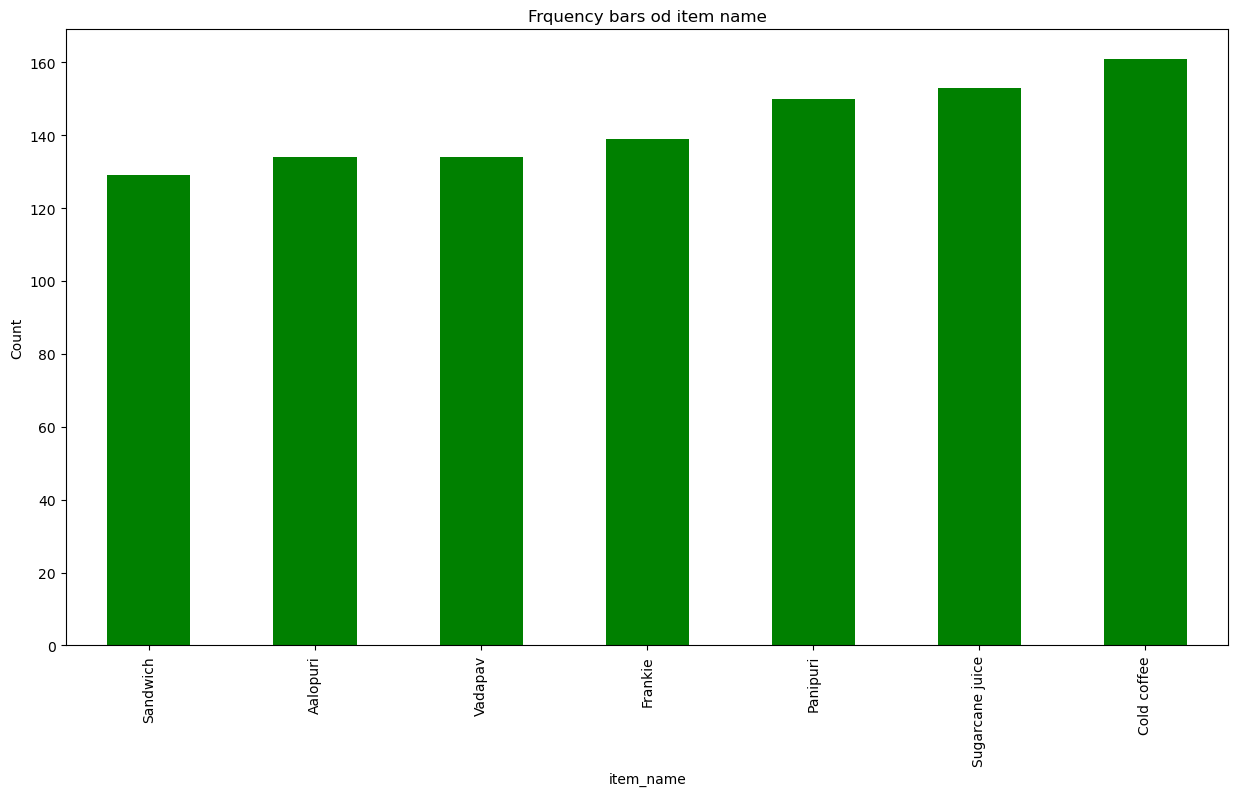

In [161]:
df['item_name'].value_counts().sort_values().plot(kind ='bar', color='green')
plt.title('Frquency bars od item name')
plt.ylabel('Count')
plt.show()

# Inference 
* The most prefered items are Cold coffee,Sugarcane juice and panipuri

# FOR ITEM TYPE 

<Axes: xlabel='item_type'>

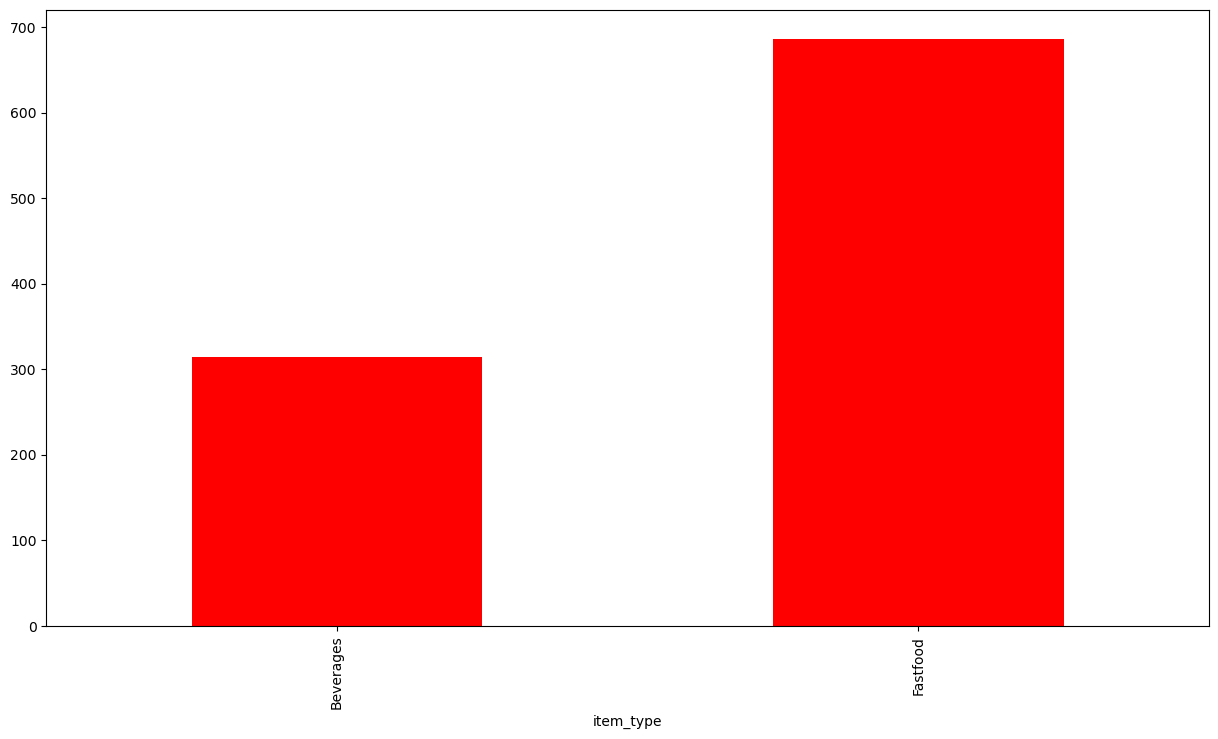

In [159]:
df['item_type'].value_counts().sort_values().plot(kind='bar',color = 'red')

# Inference 
* Among the Beverages and fastfood ,Fastfood is the customer most prefered Item type as per this restaurant data

# COUNT PLOT

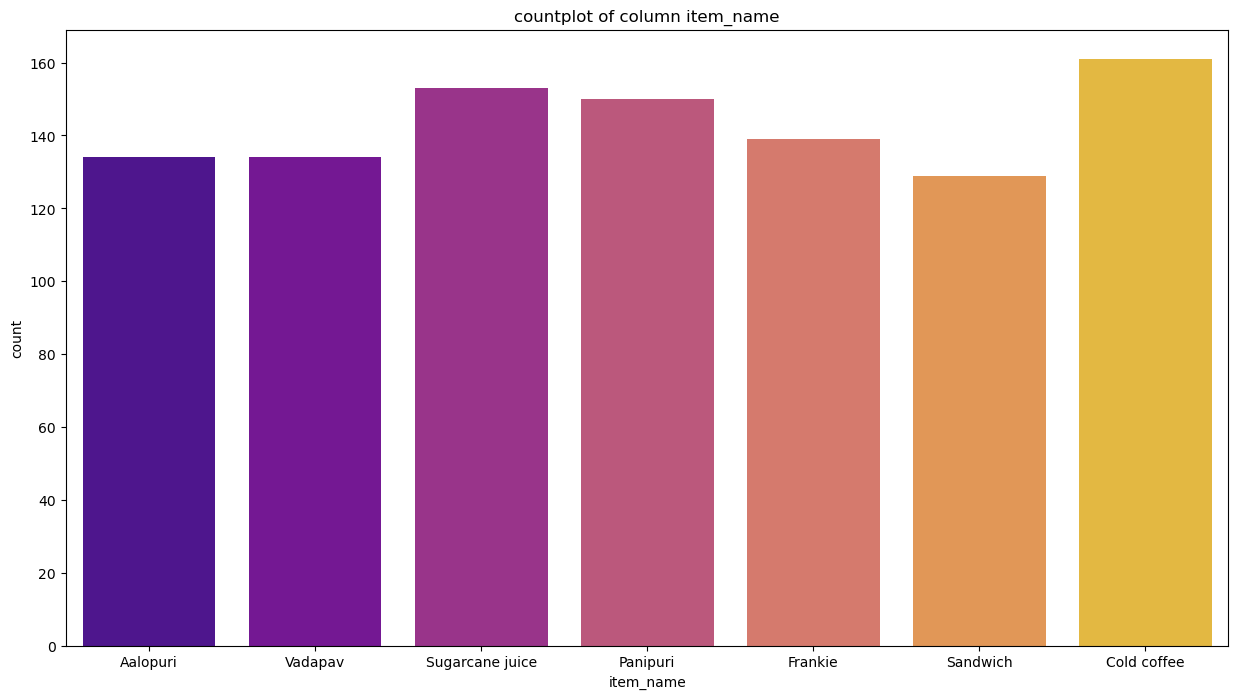

In [166]:
sns.countplot(x=df['item_name'],palette = 'plasma')
plt.title('countplot of column item_name')
plt.show()

In [168]:
# Using Subplot to visualize the categorical columns 

<function matplotlib.pyplot.show(close=None, block=None)>

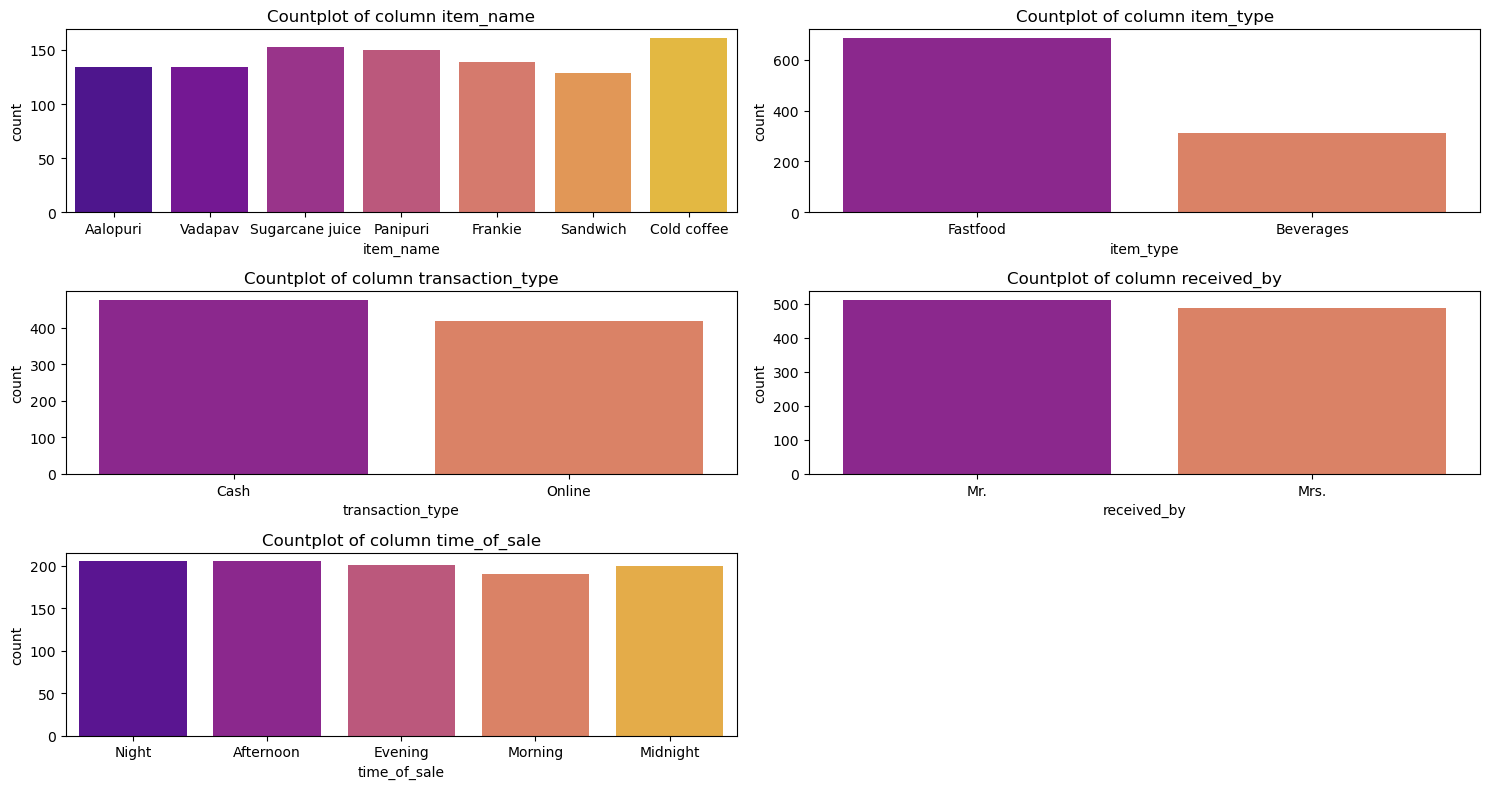

In [180]:
t = 1
for i in cat:
    plt.subplot(3,2,t)
    sns.countplot(x=df[i],palette='plasma')
    plt.title(f'Countplot of column {i}')
    t+=1
plt.tight_layout() # helps u in arranging the plots in a grid without overlapping 
plt.show

# 3.Pie Chart 

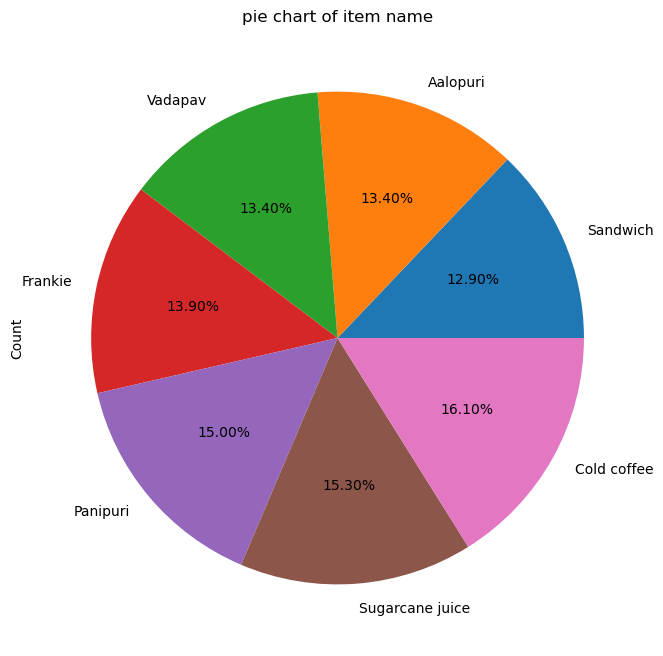

In [189]:
df['item_name'].value_counts().sort_values().plot(kind ='pie',autopct = '%.2f%%')
plt.title('pie chart of item name')
plt.ylabel('Count')
plt.show()

# Inference 
* Visualizing the categorical columns and its contributiuon percentage through pie chart 
* Cold coffee sharing 16.10% of the total sales 

# Pie Chart can also be visualize through matplotliob

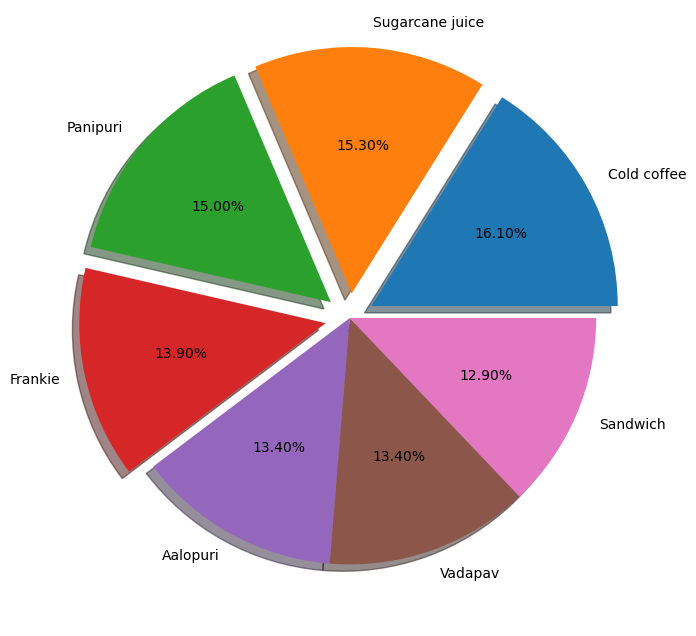

In [193]:
plt.pie(df['item_name'].value_counts(),
       labels = df['item_name'].value_counts().index,
       autopct = '%.2f%%',shadow = True,
       explode = [0.1,0.1,0.1,0.1,0,0,0])
plt.show()

# Pie chart visualization using Subplot

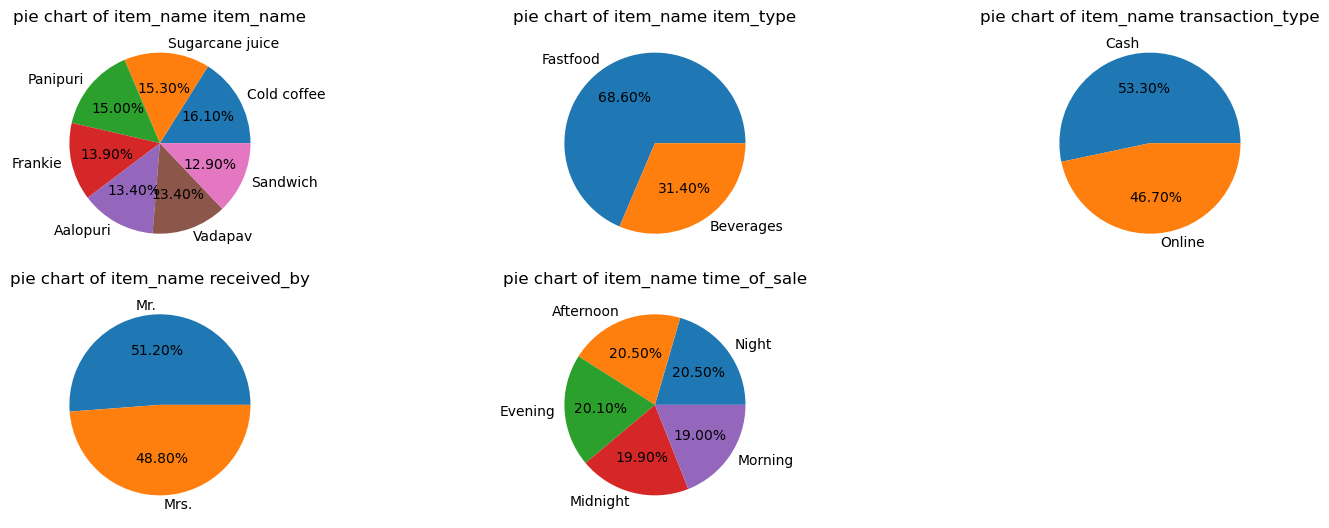

In [207]:
t = 1
for i in cat:
    plt.subplot(3,3,t)
    plt.pie(df[i].value_counts(),labels =df[i].value_counts().index,
           autopct = '%.2f%%')
    plt.title(f'pie chart of item_name {i}')
    t+=1
plt.tight_layout()
plt.show()

# UNIVARIATE ANALYSIS ON NUMERICAL COLUMNS 

In [143]:
# list of numerical columns 
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

# Histplot - using seaborn 

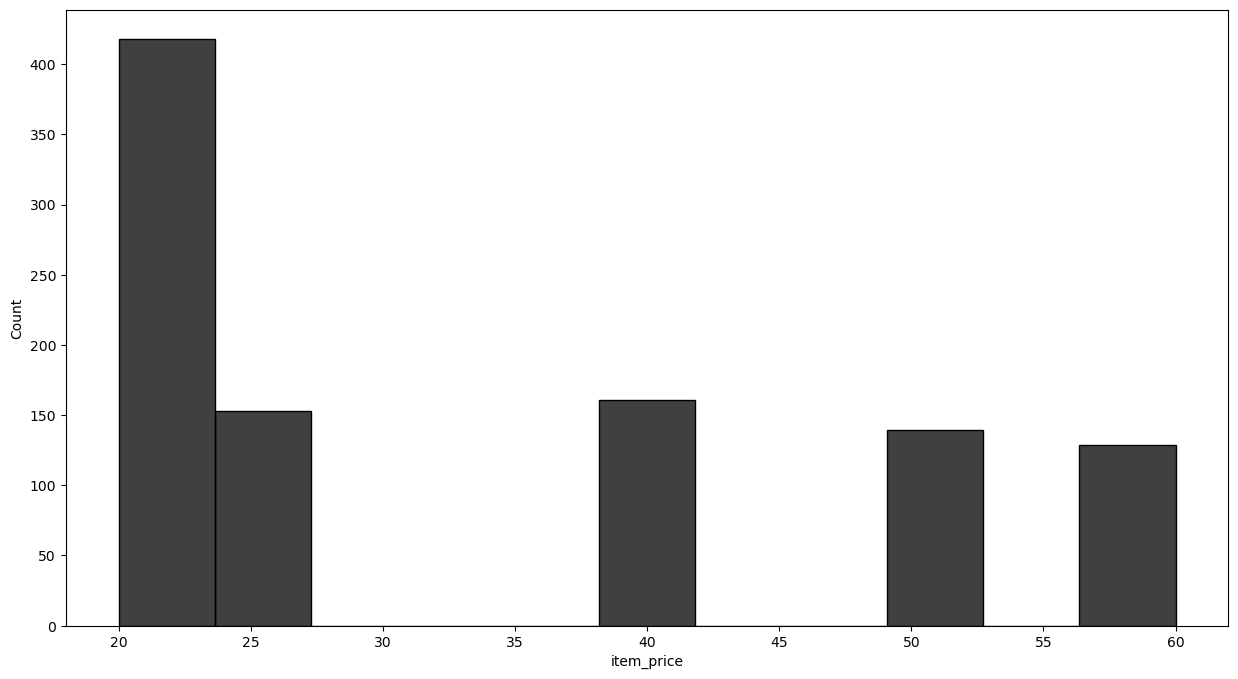

In [146]:
sns.histplot(df['item_price'],color ='black')
plt.show()

# Inference 
* Most of the Item_price is between 20 -30 

# Histplot using subplot

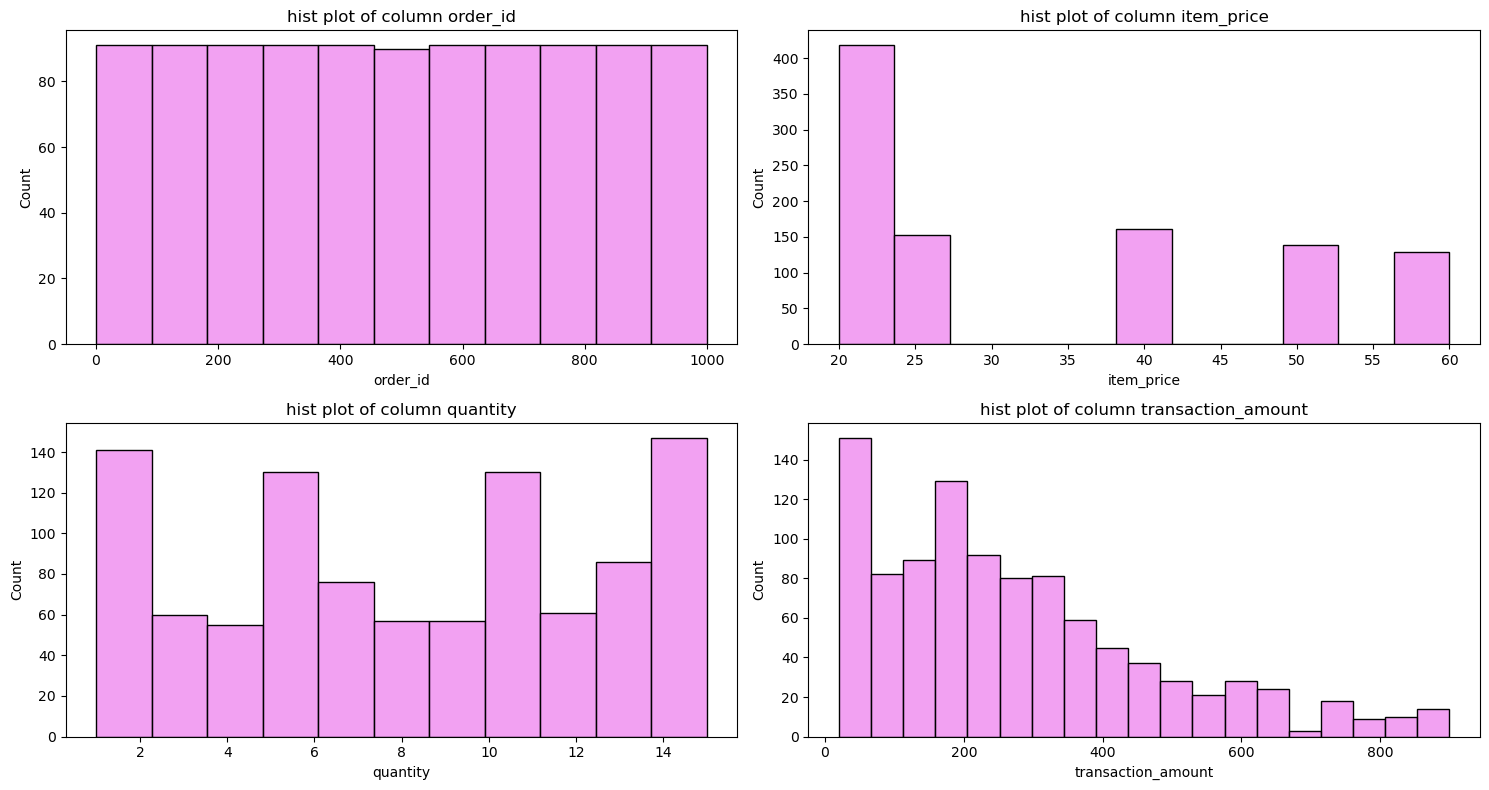

In [149]:
t=1
for i in num:
    plt.subplot(2,2,t)
    sns.histplot(df[i],color='violet')
    plt.title(f'hist plot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

# Histplot using Matplotlip

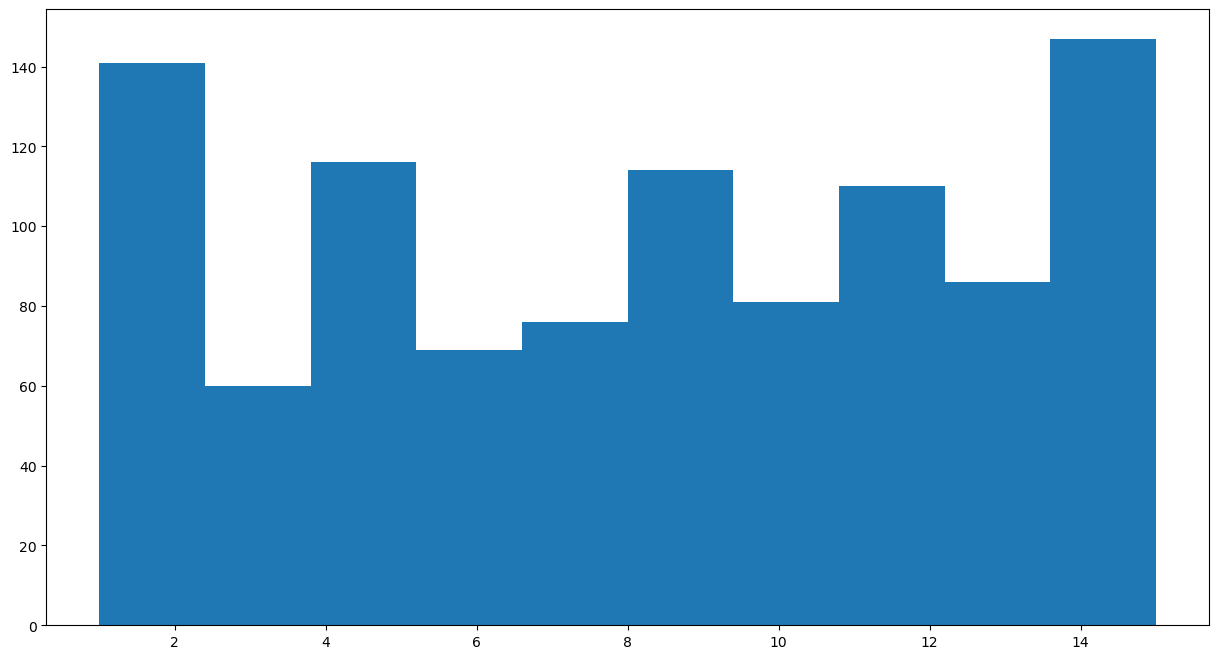

In [225]:
plt.hist(df['quantity'])
plt.show()

# 2.Distplot - Distribution Plot 

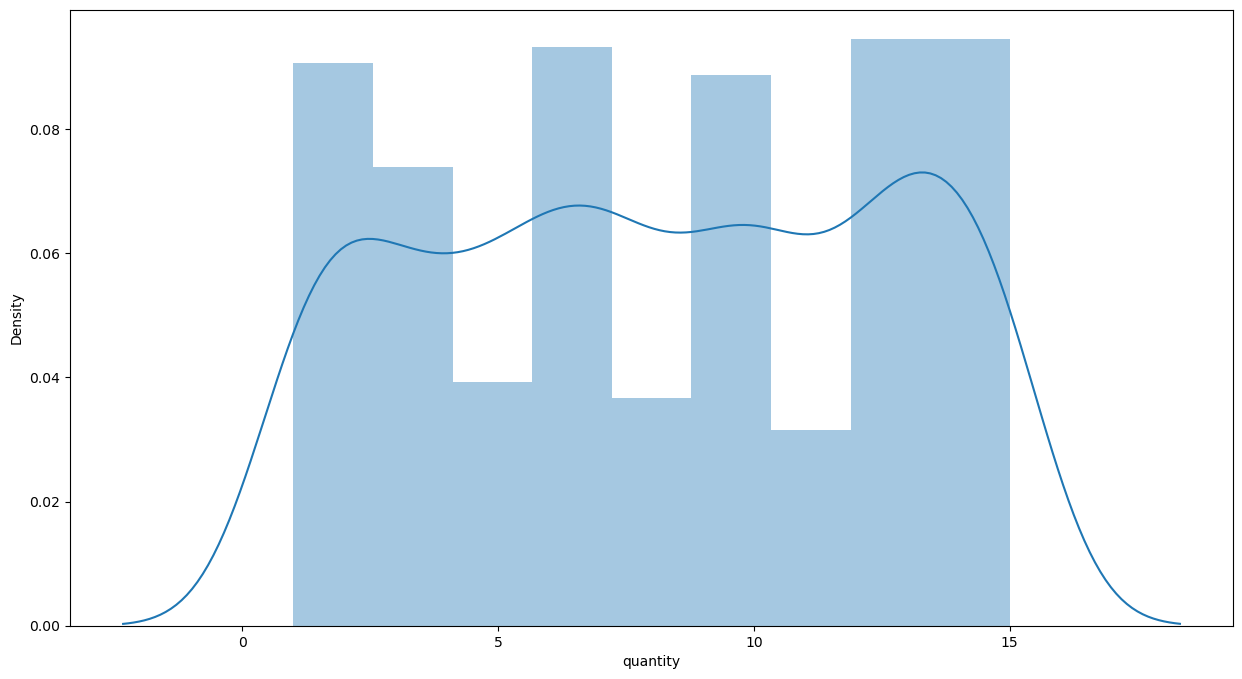

In [154]:
sns.distplot(df['quantity'])
plt.show()

# Hist=false will show only distribution of the varibale used

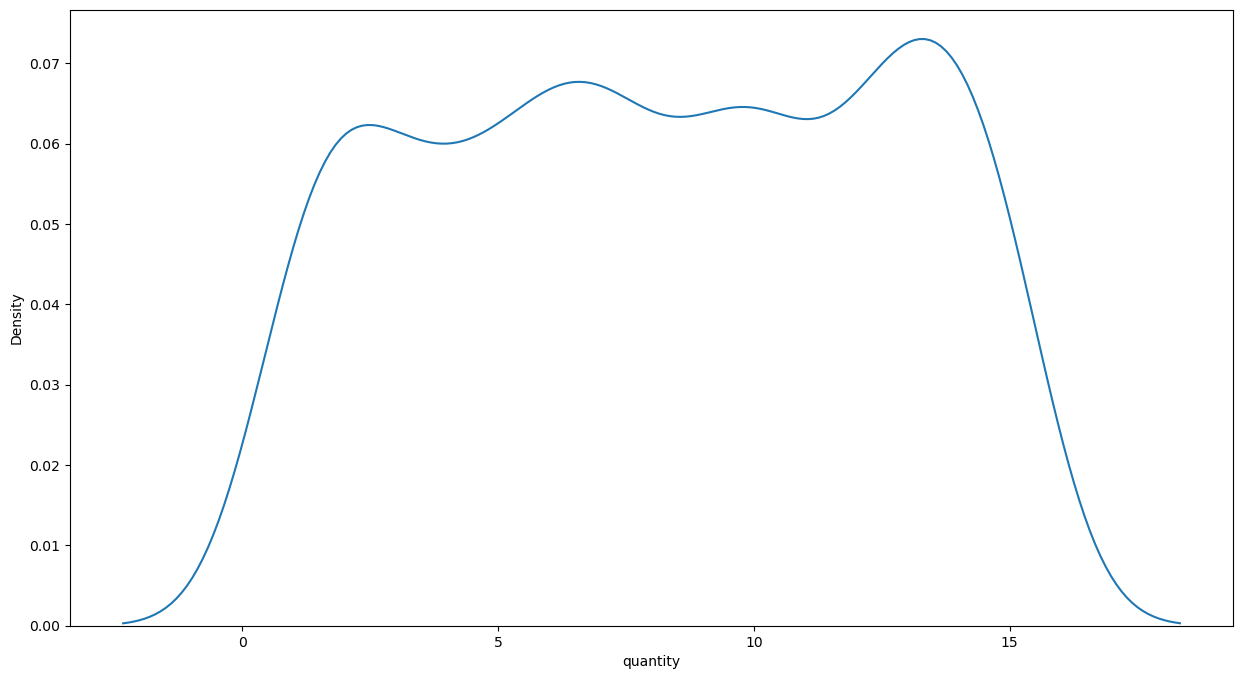

In [271]:
sns.distplot(df['quantity'],hist=False)
plt.show()

# KDE PLOT 
* USING SUBPLOT

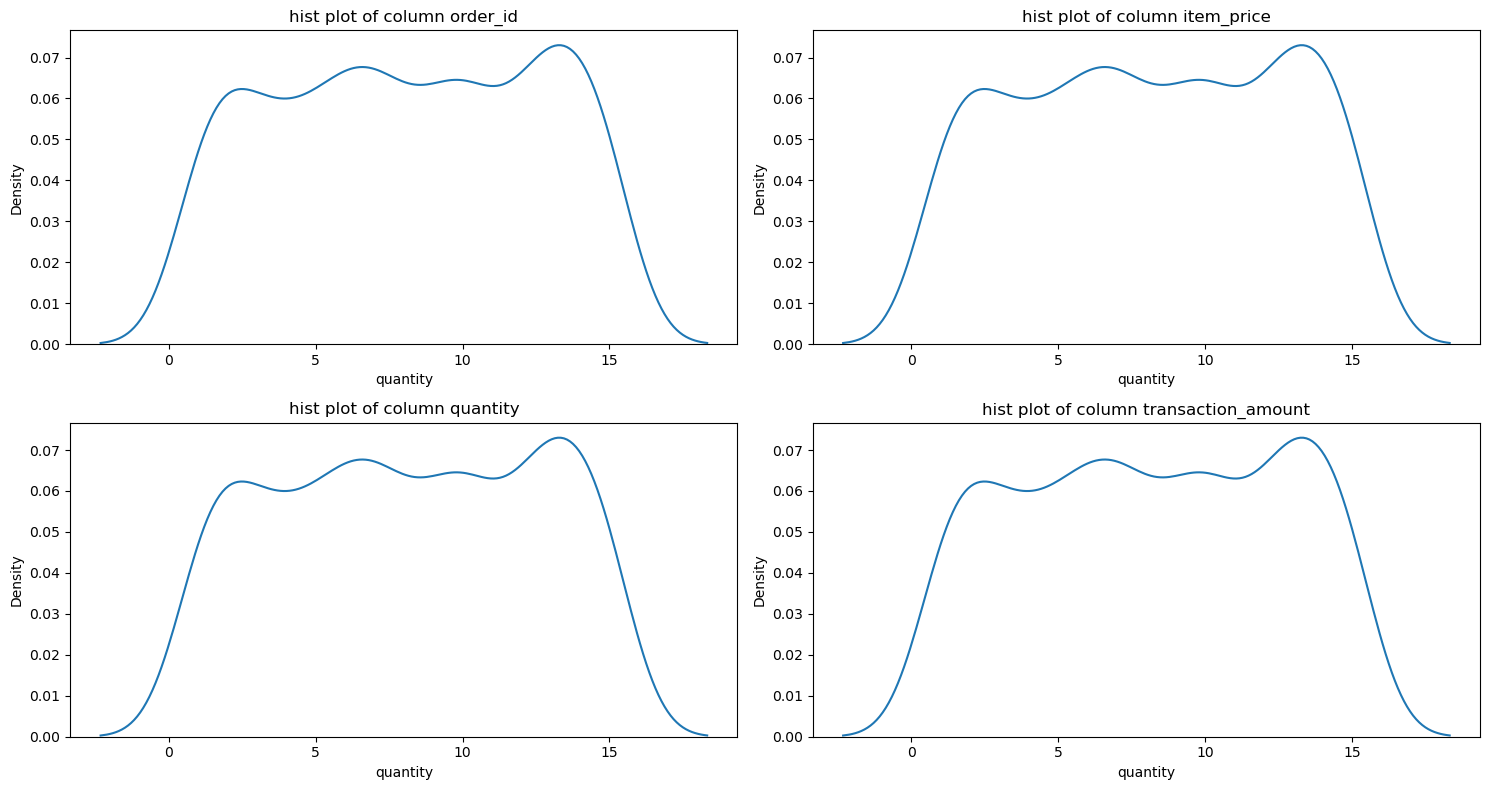

In [261]:
t=1
for i in num:
    plt.subplot(2,2,t)
    sns.kdeplot(df['quantity'])
    plt.title(f'hist plot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

# kdeplot - dirctly we can add kdeplot will give the distriution (dis = false /kde=true/sns.kdeplt) all three give the same output

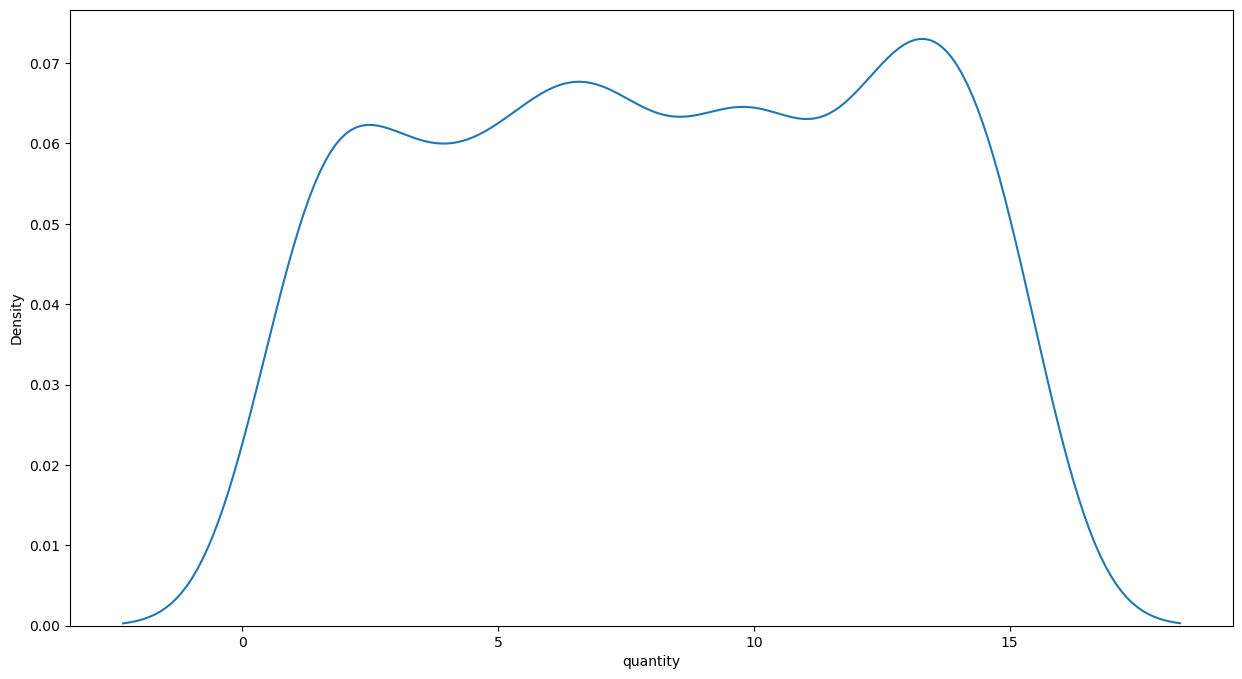

In [235]:
sns.kdeplot(df['quantity'])
plt.show()

# BOXPLOT 
To visualize the potential outliers in the data set

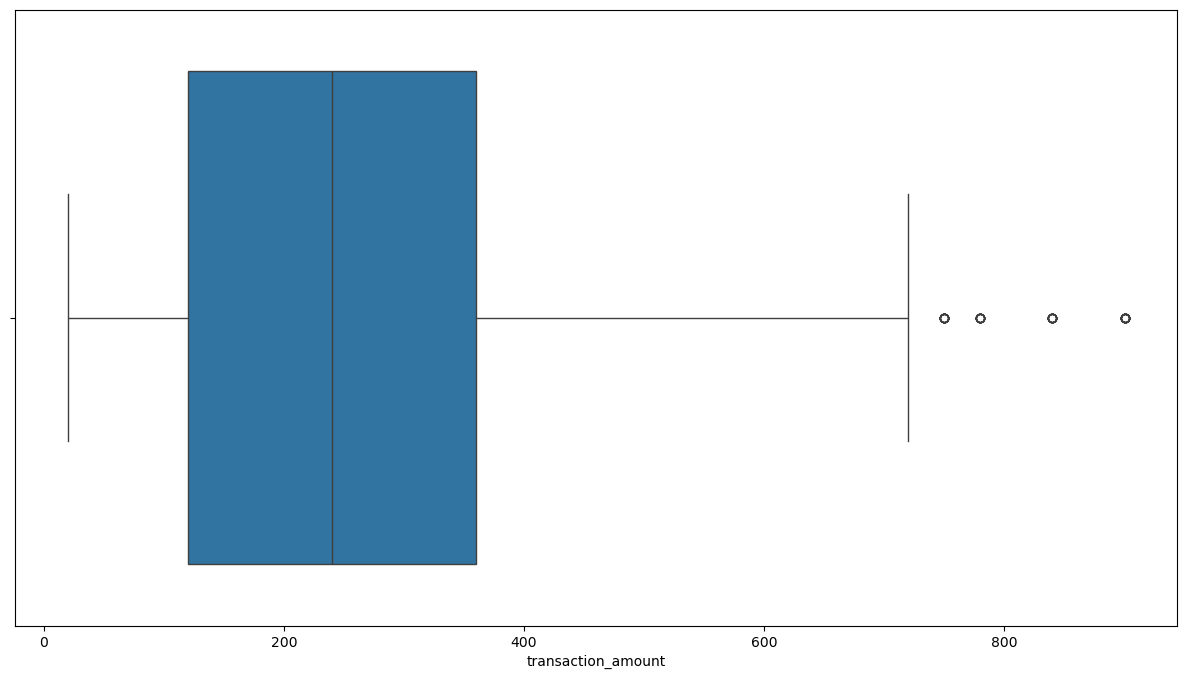

In [241]:
sns.boxplot(x = df['transaction_amount'])
plt.show()

# BOXPLOT USING SUBPLOT 

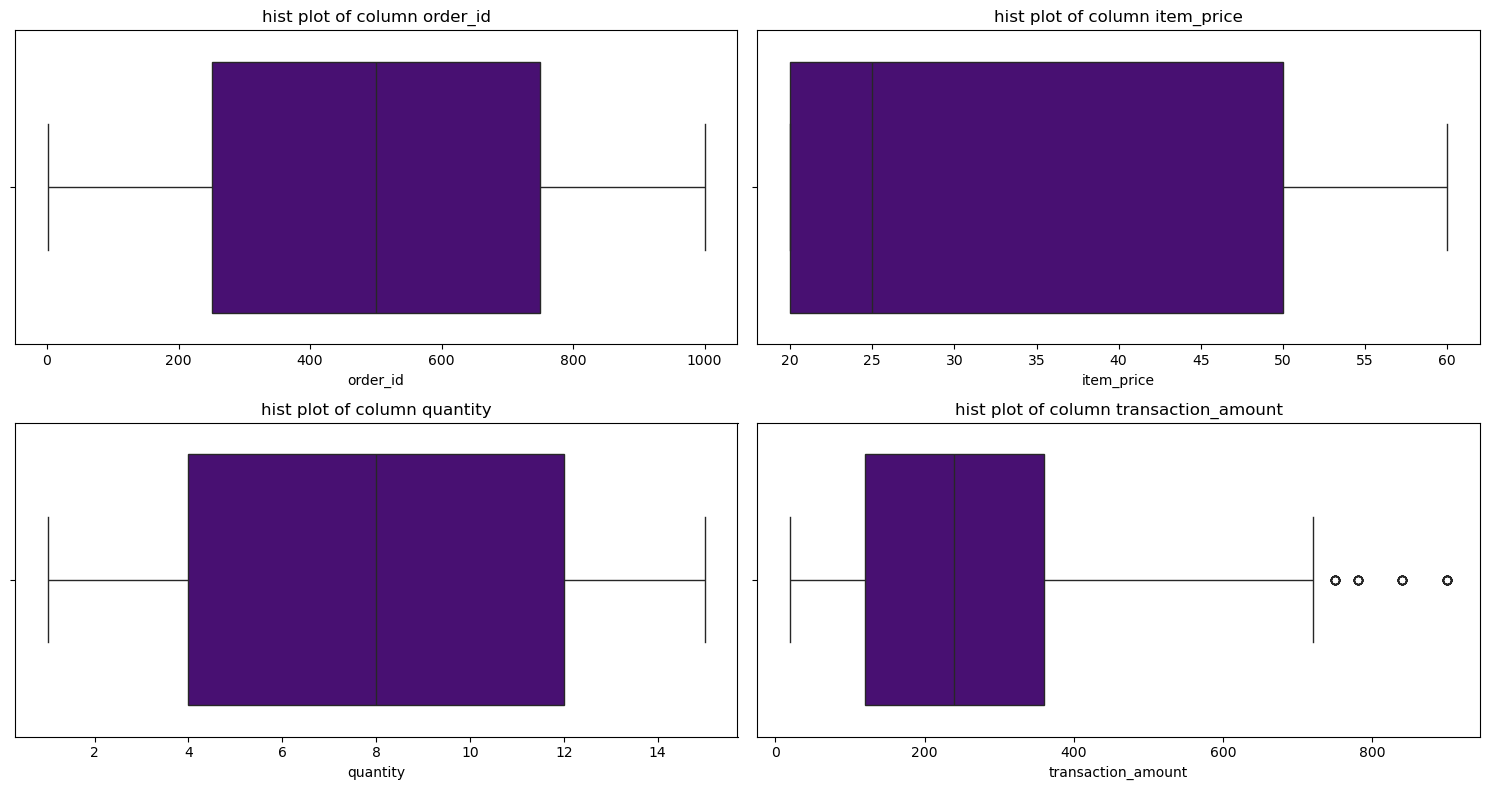

In [259]:
t=1
for i in num:
    plt.subplot(2,2,t)
    sns.boxplot(x =df[i],color='indigo')
    plt.title(f'hist plot of column {i}')
    t+=1
plt.tight_layout()
plt.show()

# Inference 
* In numerical varibales only Transaction_amount has an outlier moderatly either we can treat the outlier or work without 
treating it or we can remove it based on the domains specific needs.

# BIVARIATE ANALYSIS - NUMERICAL VS NUMERICAL

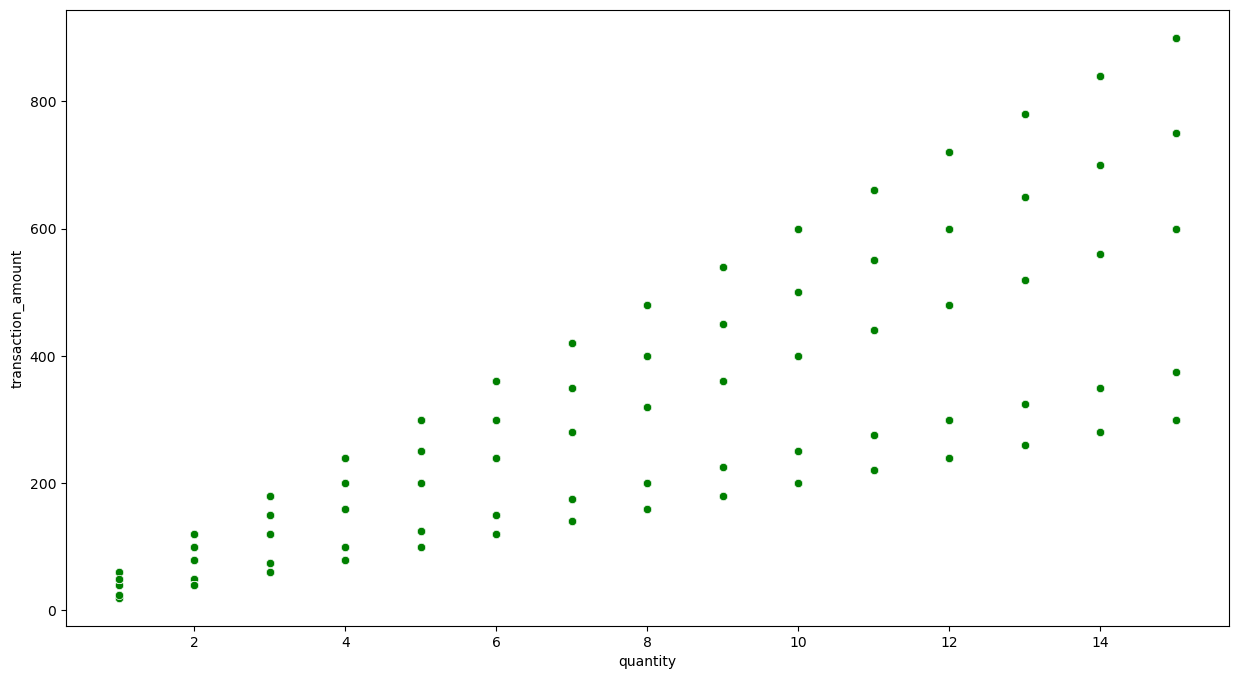

In [277]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],color = 'green')
plt.show()

# Inference :
There is a poistive correlation between these two variables as quantity increases when transaction amount increases. 

# plt.plot() or lineplot - using matplotlip


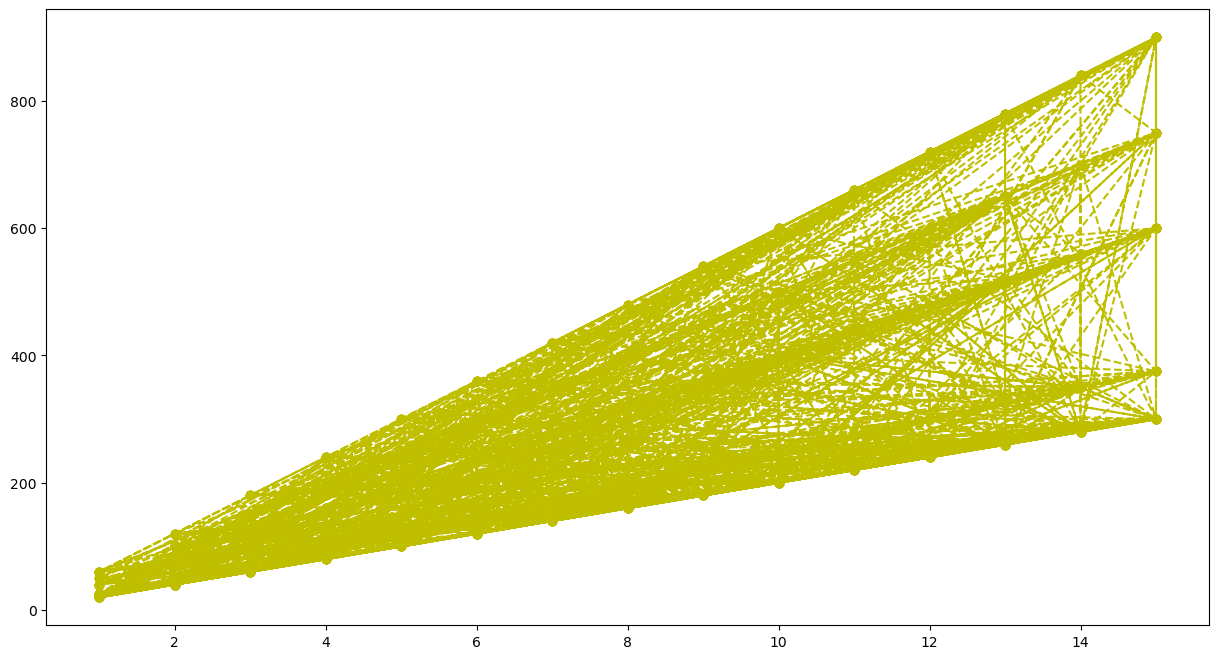

In [288]:
plt.plot(df['quantity'],df['transaction_amount'],'yo',linestyle='--')
plt.show()

# SCATTER PLOT USING SUBPLOT 

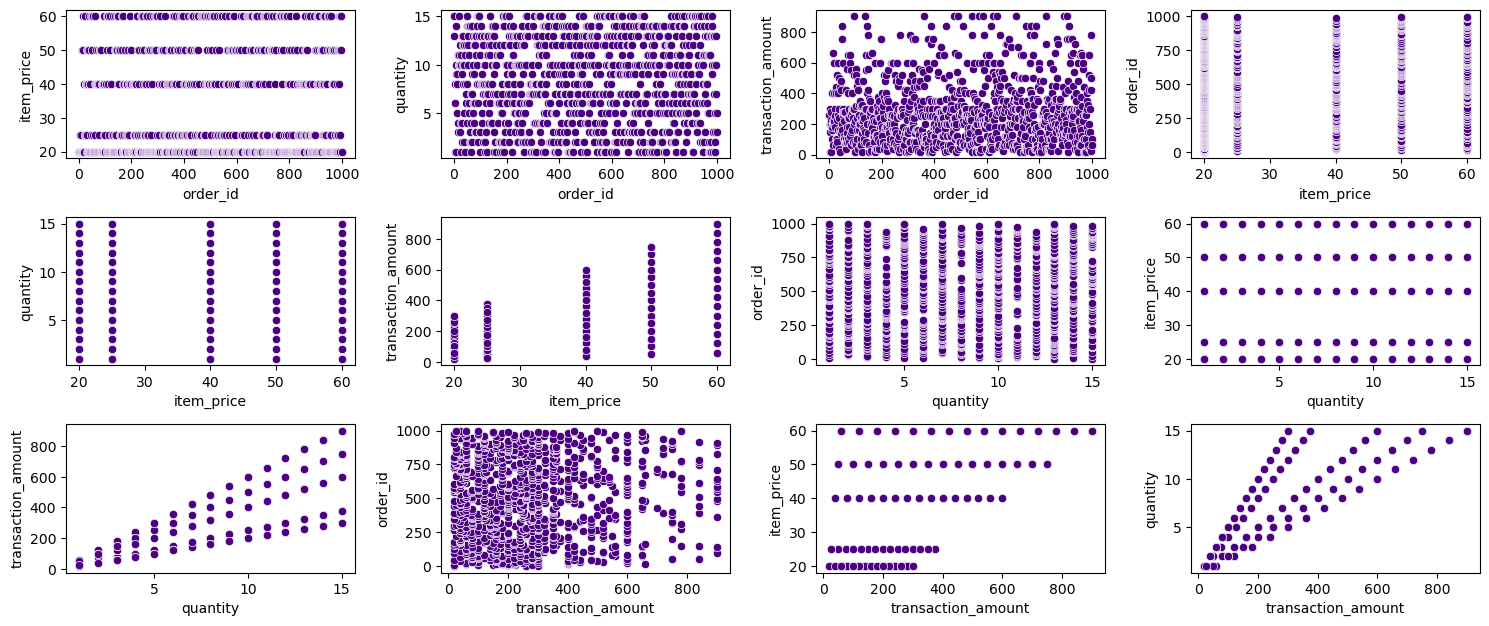

In [296]:
t=1
for i in num:
    for j in num:
        if i!=j:
            plt.subplot(4,4,t)
            sns.scatterplot(x =df[i],y=df[j],color='indigo')
            t+=1
plt.tight_layout()
plt.show()

# linplot using subplot 

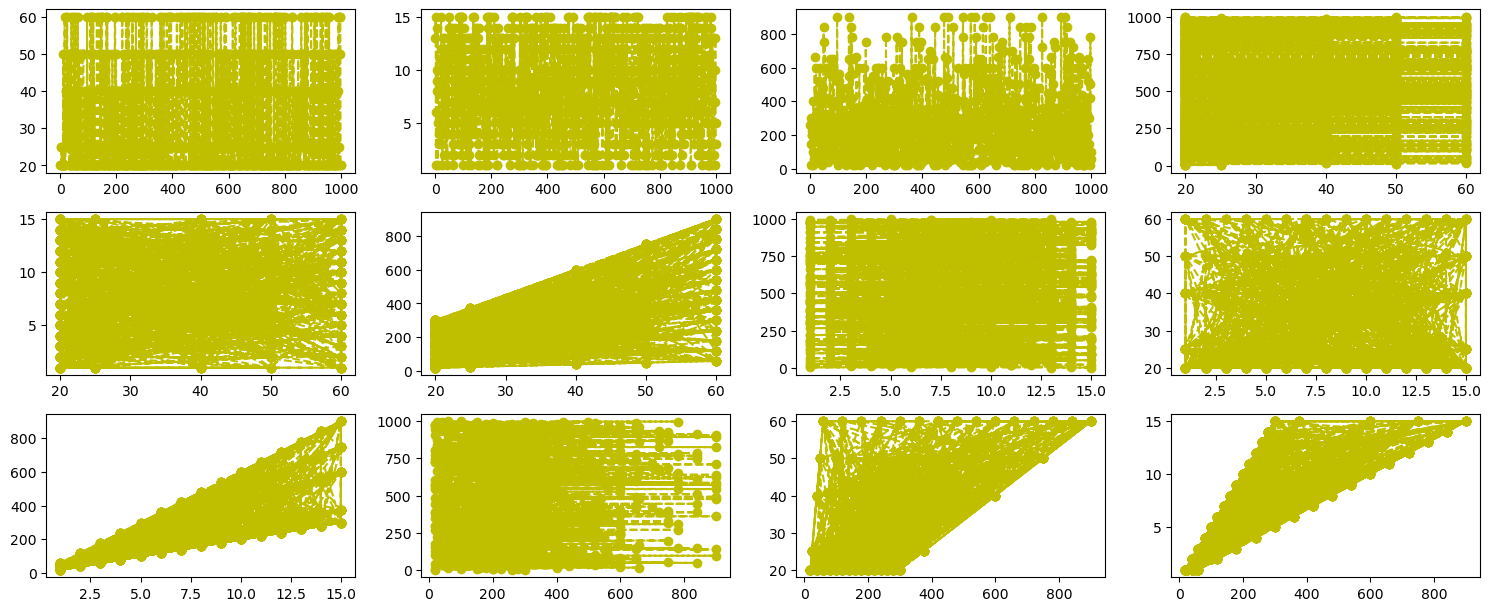

In [302]:
t = 1
for i in num:
    for j in num:
        if i!=j:
             plt.subplot(4,4,t)
             plt.plot(df[i],df[j],'yo',linestyle='--')
             t+=1
plt.tight_layout()
plt.show()

# NUMERICAL VS CATEGORICAL
 # ANALYSING USING BARPLOT

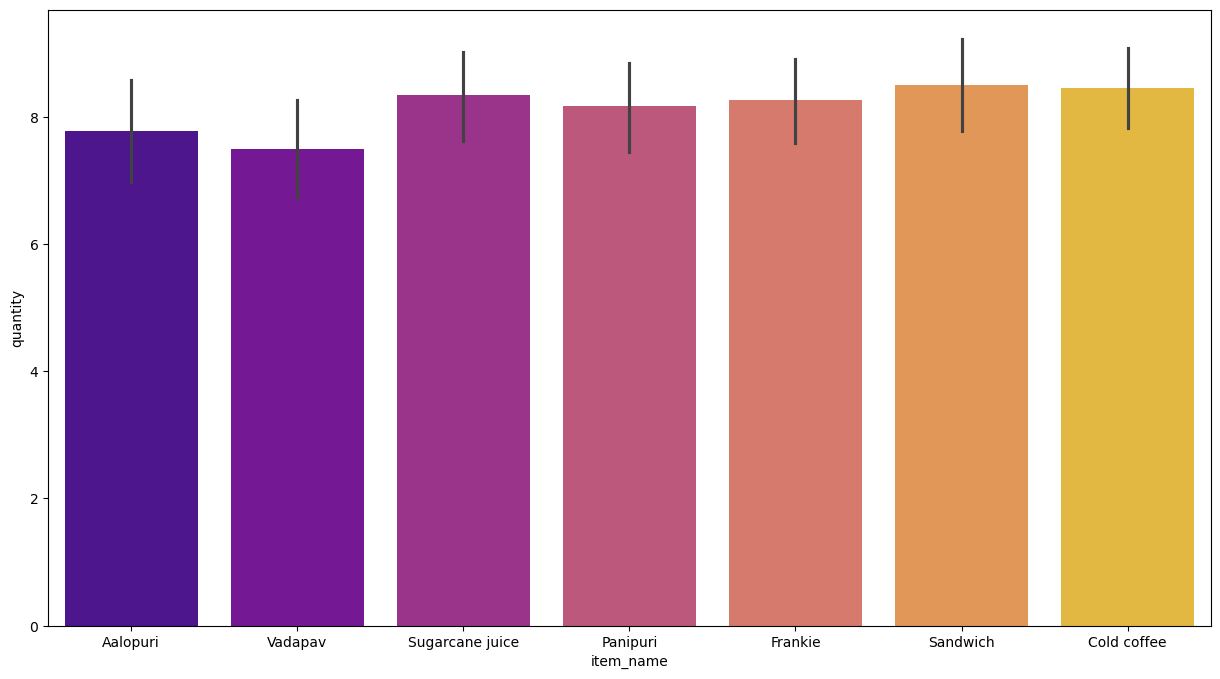

In [307]:
sns.barplot(x=df['item_name'], y= df['quantity'],palette = 'plasma')
plt.show()

# Bar plot using group by functioN

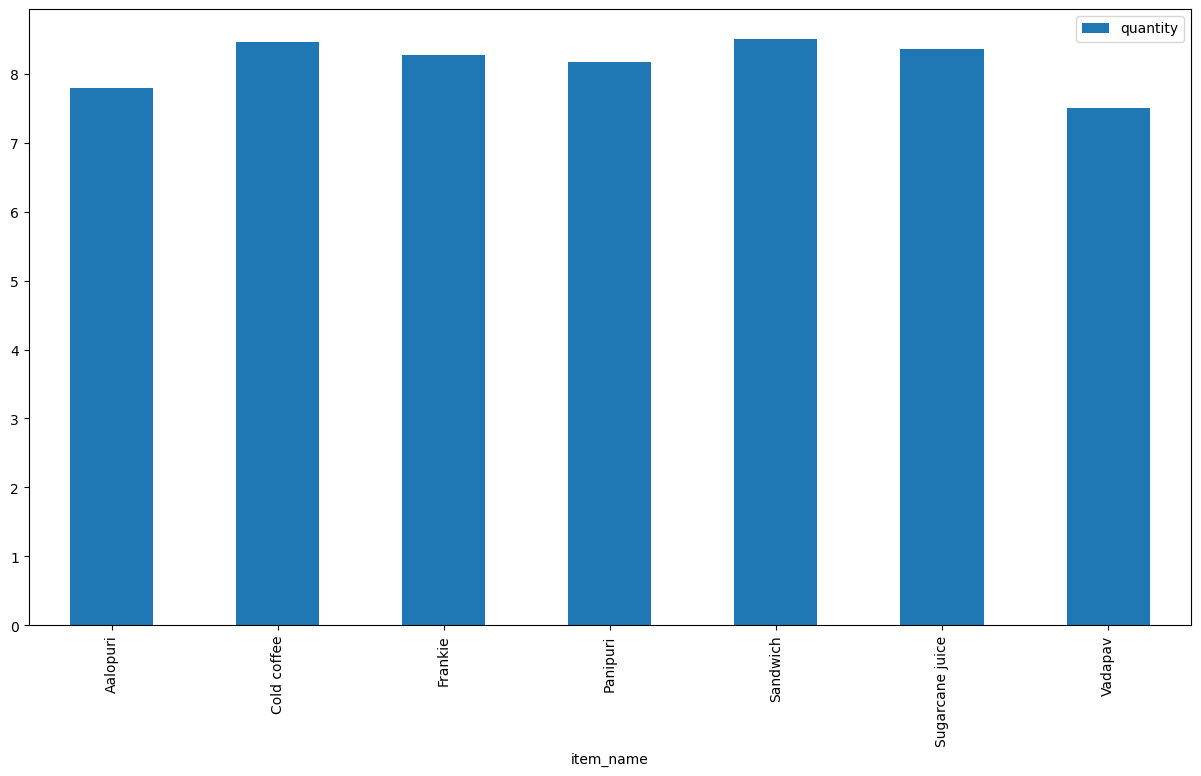

In [309]:
df.groupby(by=['item_name'])[['quantity']].mean().plot(kind='bar')
plt.show()

# num vs cat using box plot 

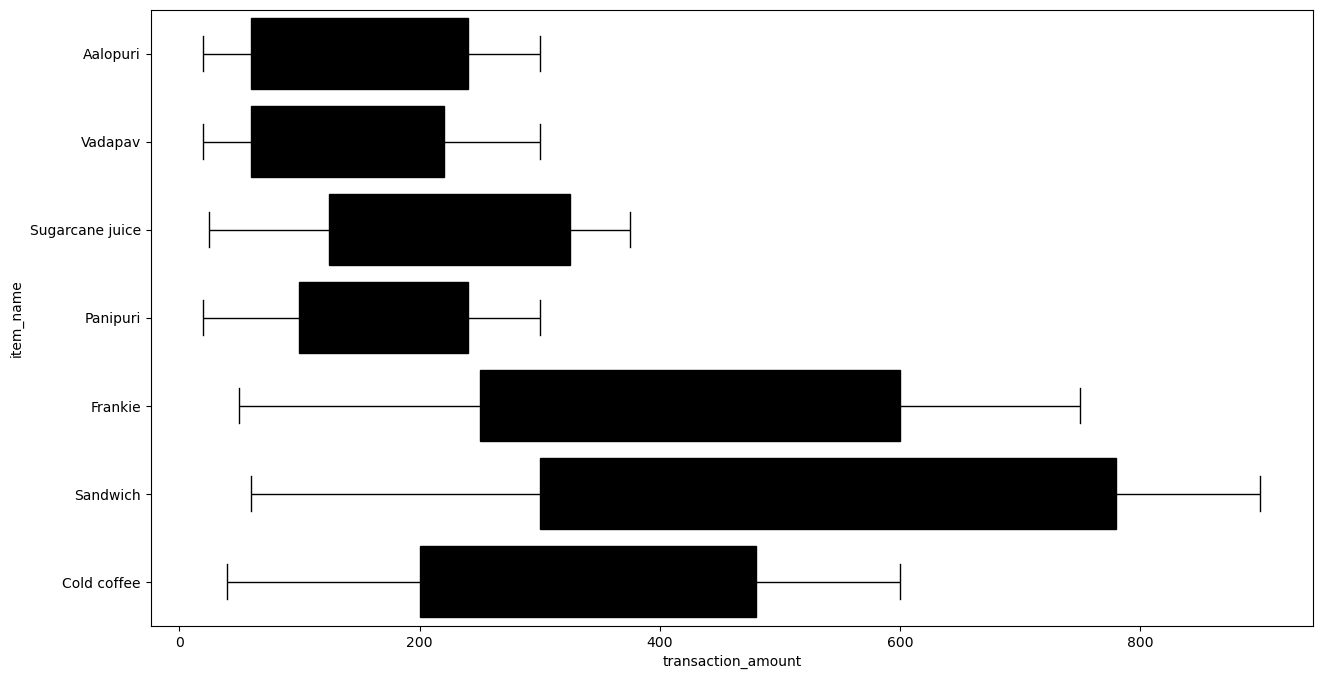

In [317]:
sns.boxplot(x=df['transaction_amount'],y=df['item_name'],color='black')
plt.show()

# Visualizing the barplot using Subplot 

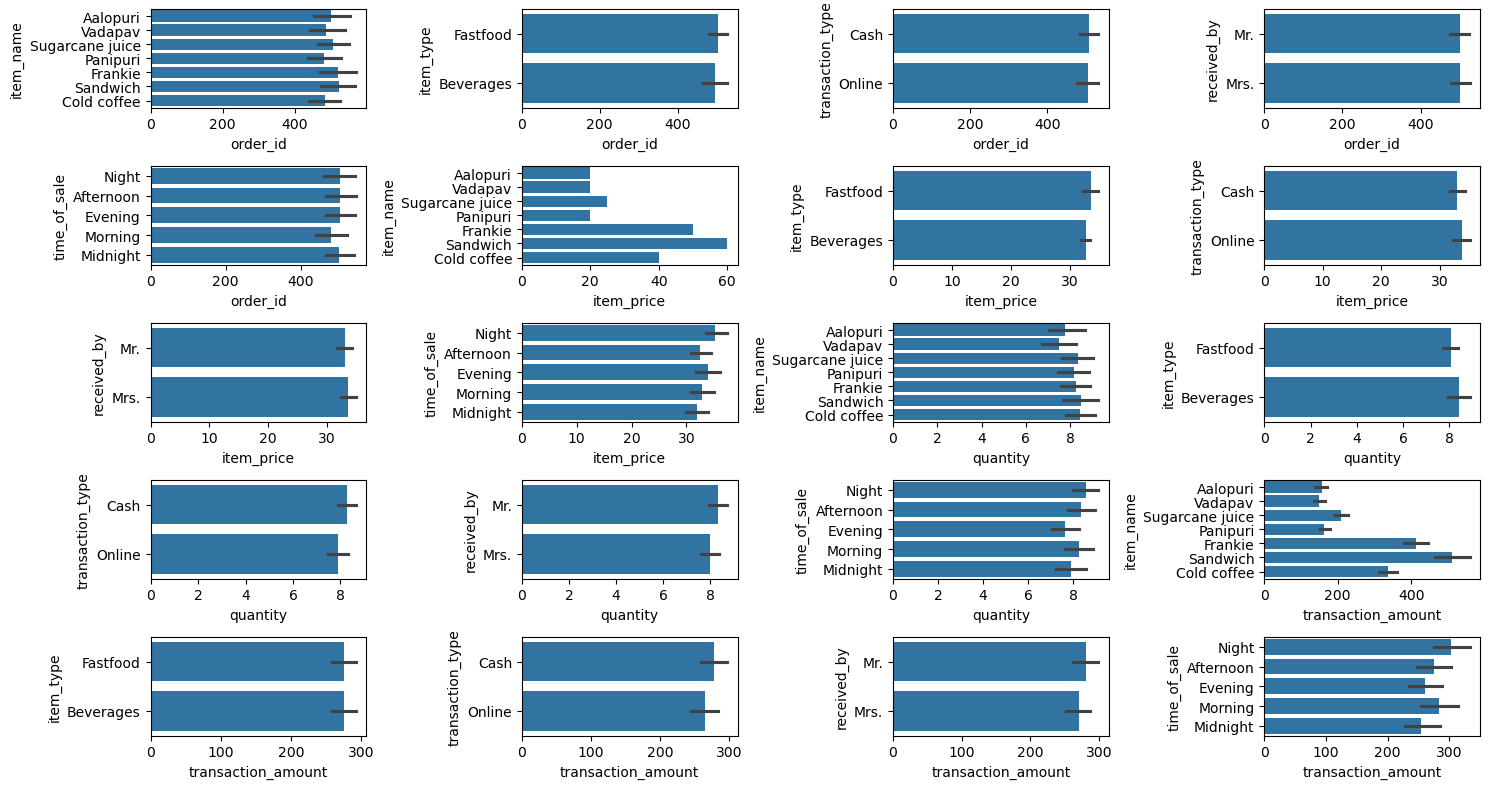

In [167]:
t = 1
for i in num:
    for j in cat:
        plt.subplot(5,4,t)
        sns.barplot(x=df[i],y=df[j])
        t+=1
plt.tight_layout()
plt.show()

# Visualizing the boxplot using Subplot 

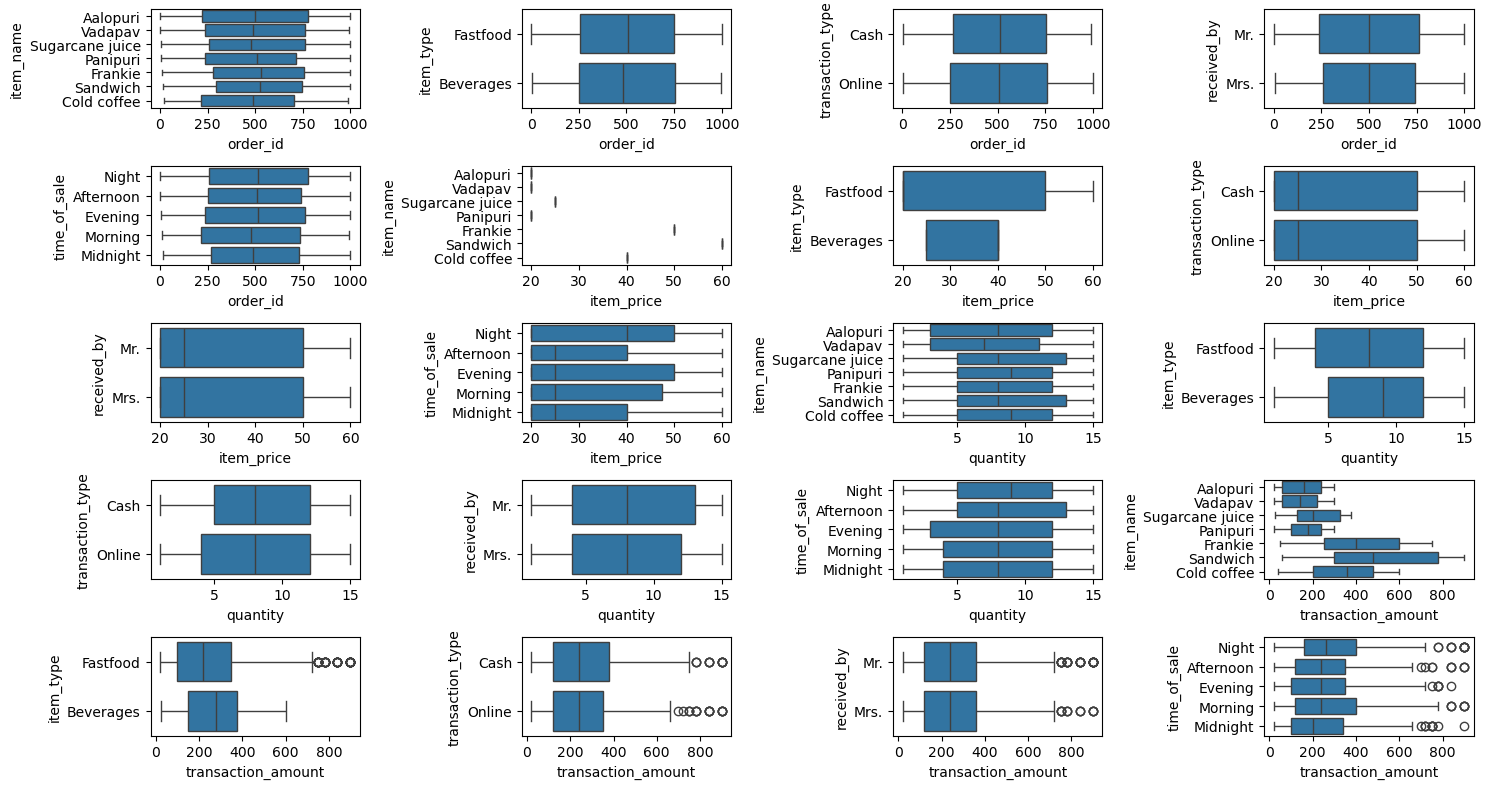

In [170]:
  t = 1
for i in num:
    for j in cat:
        plt.subplot(5,4,t)
        sns.boxplot(x=df[i],y=df[j])
        t+=1
plt.tight_layout()
plt.show()

# CATEGORY VS CATEGORY
* Using cross tab function to visualize the categorical column and categorical column

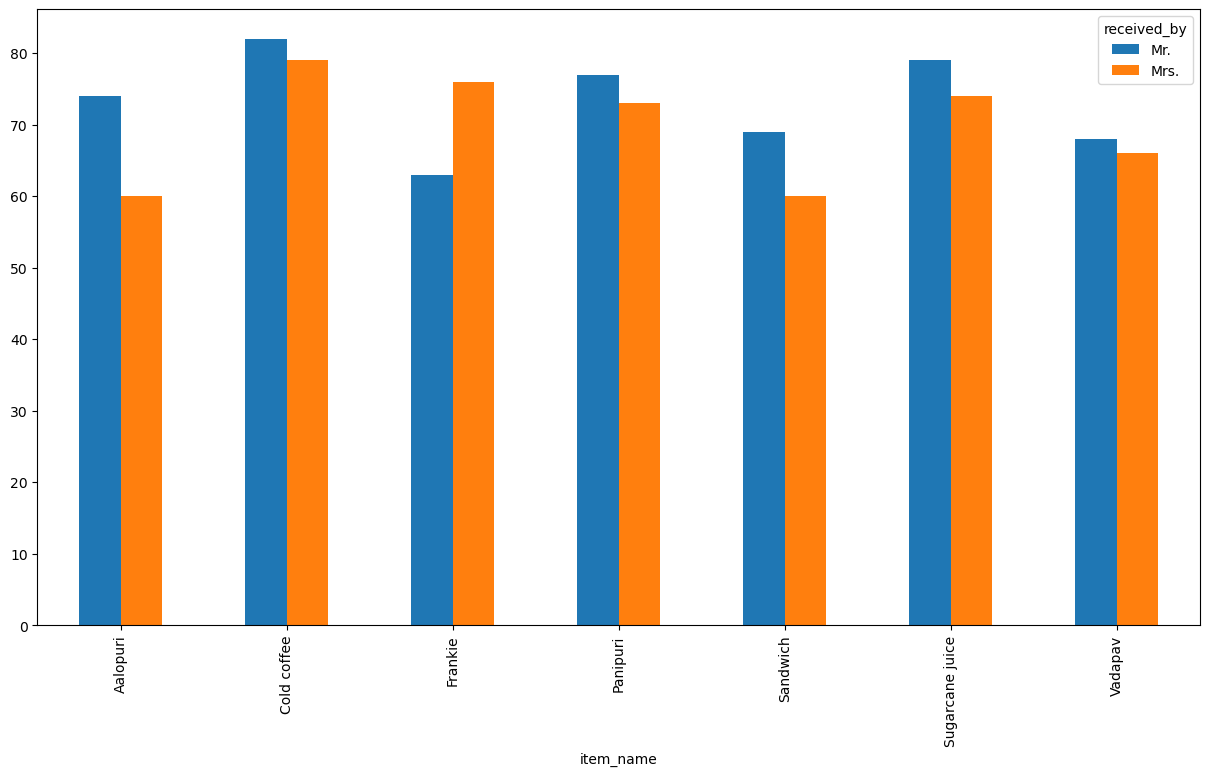

In [330]:
pd.crosstab(df['item_name'],df['received_by']).plot(kind = 'bar')
plt.show()

# Inference 
* Product frankie has more female orders than males
* Cold coffee stands the top of the table more or less prefered by both genders 

# COUNTPLOT

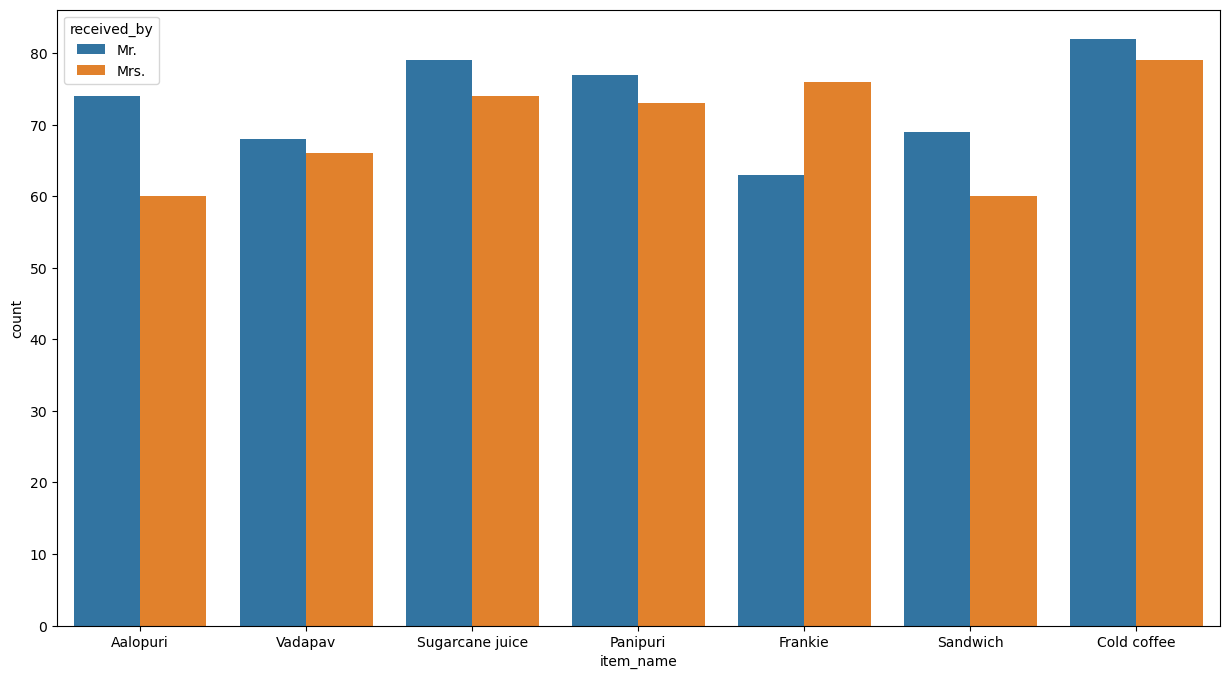

In [333]:
sns.countplot(x = df['item_name'],hue = df['received_by'])
plt.show()

In [ ]:
# count plot using subplot 

In [341]:
cat

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

t = 1
for i in cat:
    for j in cat:
        if i!=j:
            plt.subplot(5,4,t)
            sns.countplot(x=df[i],hue=df[j])
            t+=1
plt.tight_layout()
plt.show()

In [354]:
num

['order_id', 'item_price', 'quantity', 'transaction_amount']

In [356]:
cat

['item_name', 'item_type', 'transaction_type', 'received_by', 'time_of_sale']

# MULTIVARIATE VISUALIZATION
* NUM VS NUM VS CAT 

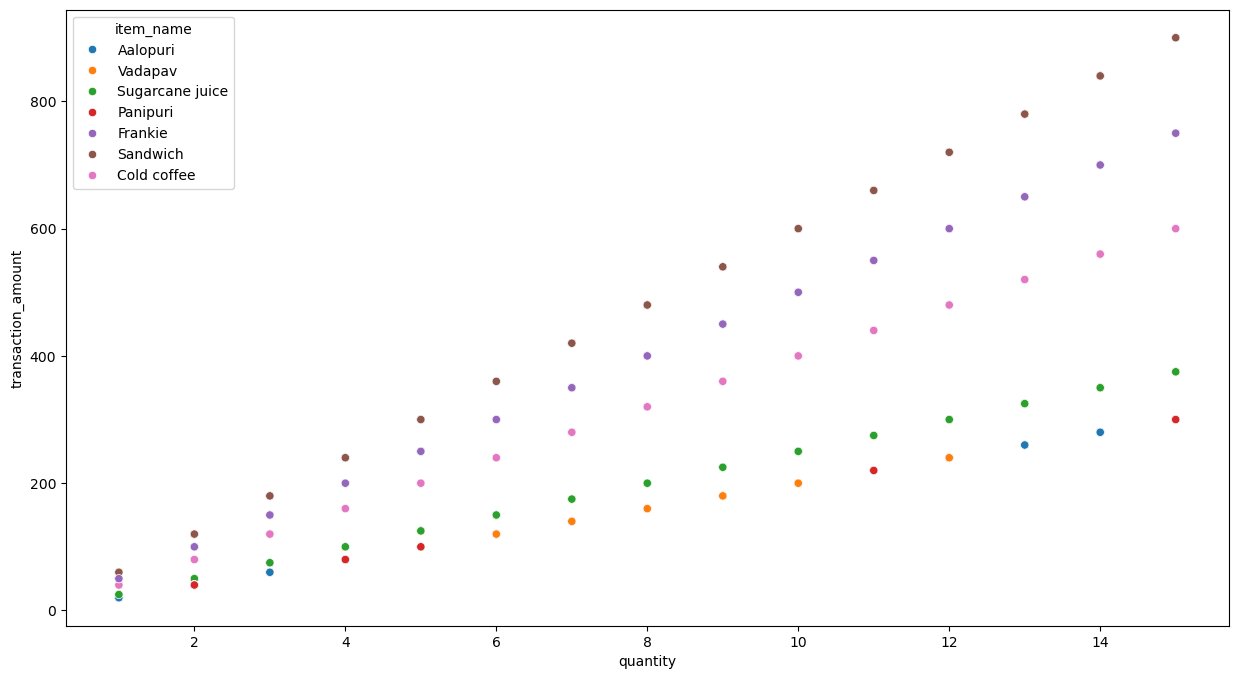

In [360]:
sns.scatterplot(x=df['quantity'],y=df['transaction_amount'],hue=df['item_name'])
plt.show()

# INFERENCE 
* Frankie,sandwich,coldcoffee Items are aligned or realted with quantity in more consistent waty then other items.
* The straight lines shows the growth of these three.
    

# num vs cat vs cat - Visualize using the  box plot 

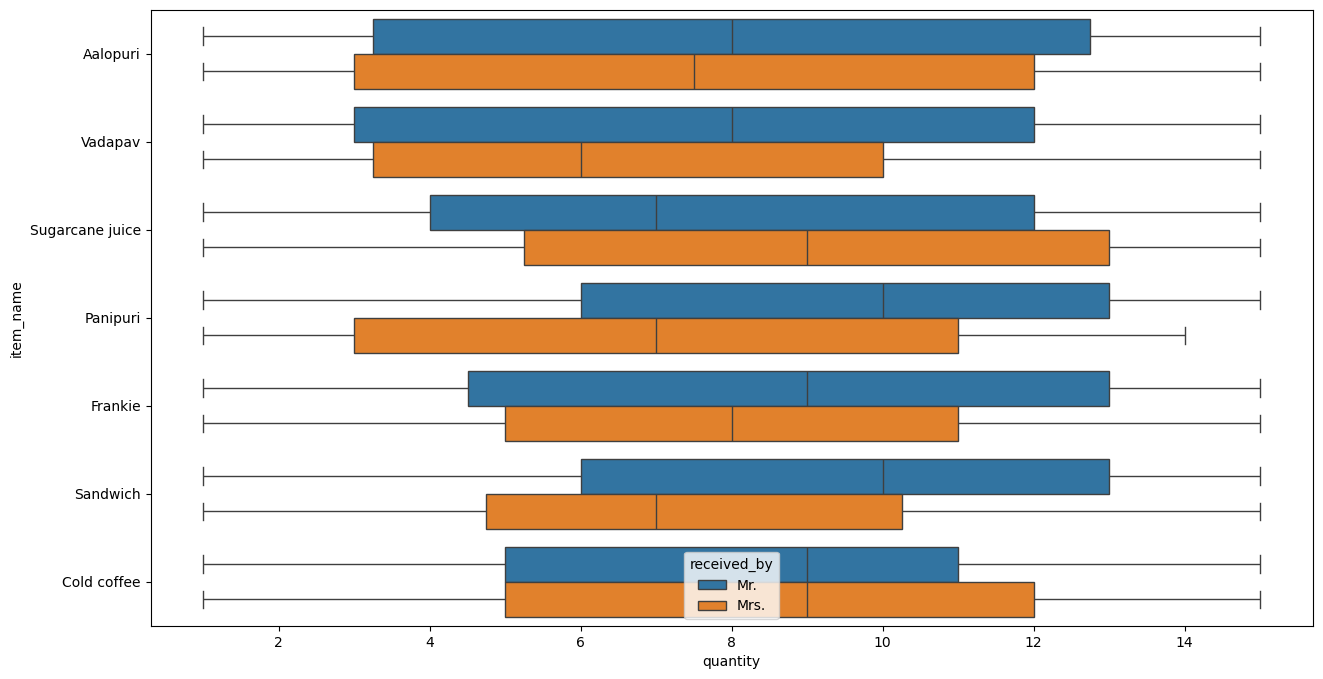

In [179]:
sns.boxplot(x=df['quantity'],y=df['item_name'],hue=df['received_by'])
plt.show()

# Heatmap - To display the relationship between varibales

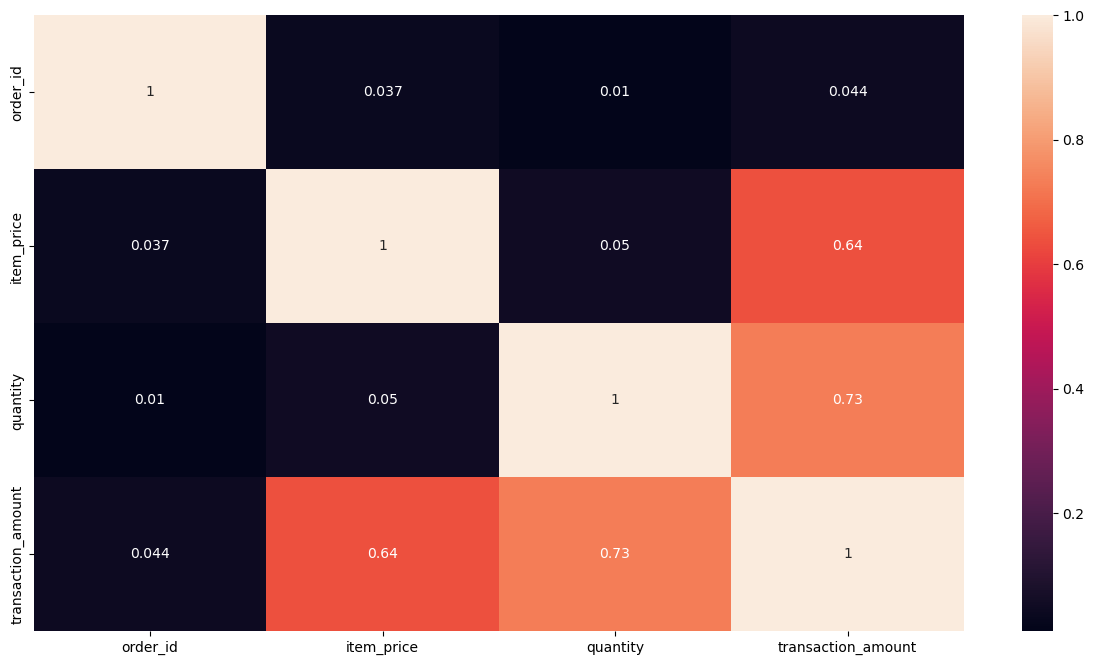

In [365]:
sns.heatmap(df[num].corr(),annot=True)
plt.show()

# Inference 
Heat map is used to find the correlation between the numerical variables 
where is shows thew color gradiant accordingly based on the correlation values 
* Item_price and Transaction amount moderatley co-related
* Quantity and Transaction amount moderatley co-related

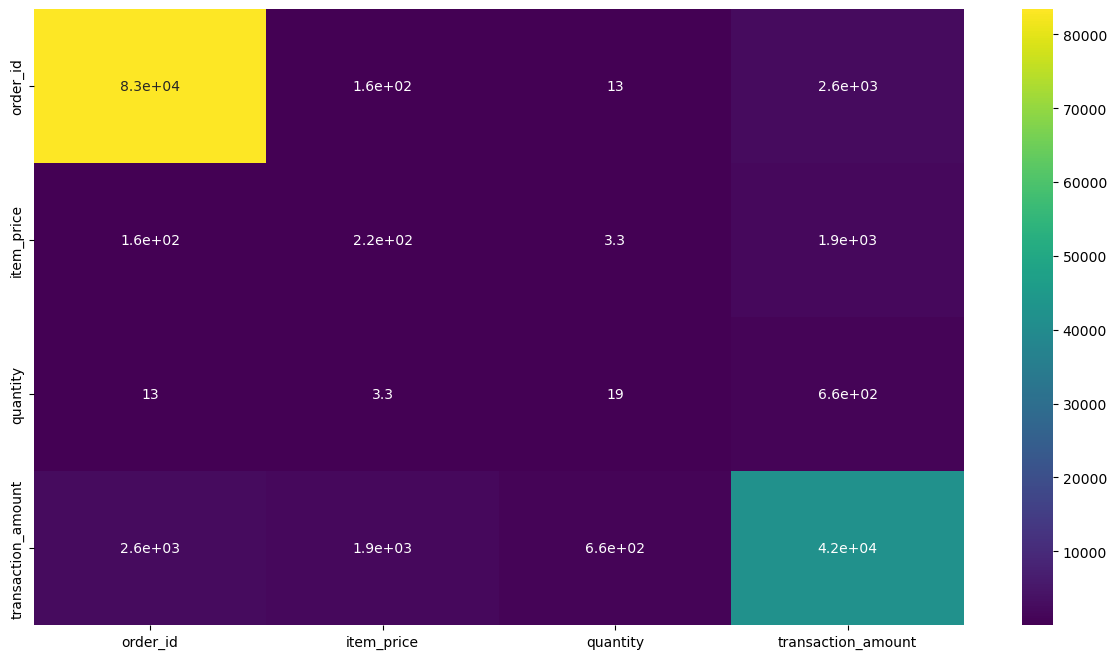

In [371]:
sns.heatmap(df[num].cov(),annot=True,cmap='viridis')
plt.show()

# To find the null vlaues using heatmap 

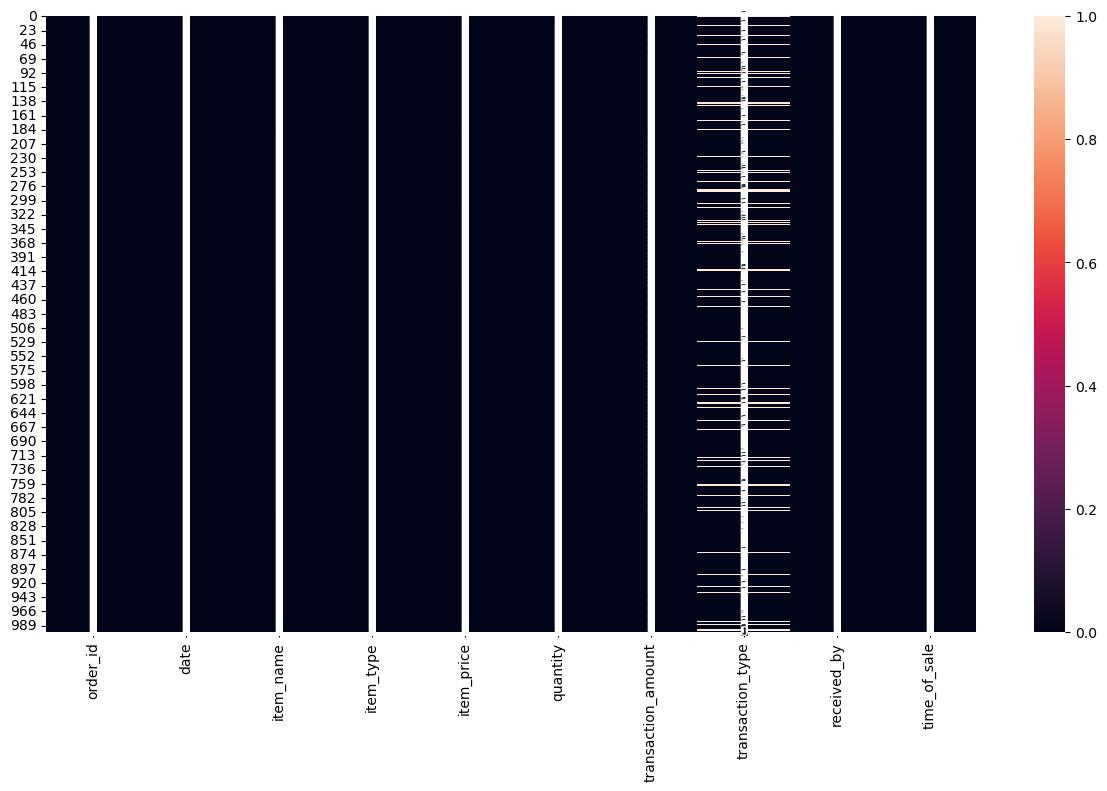

In [373]:
sns.heatmap(df.isnull(),annot=True)
plt.show()

# Inference 
Transaction_type varibale has null values in it which is clearly visualized using heatmap 

# PAIR PLOT 
To see the relationships between different pairs of variables, as well as the distribution of each variable we use pair plot .

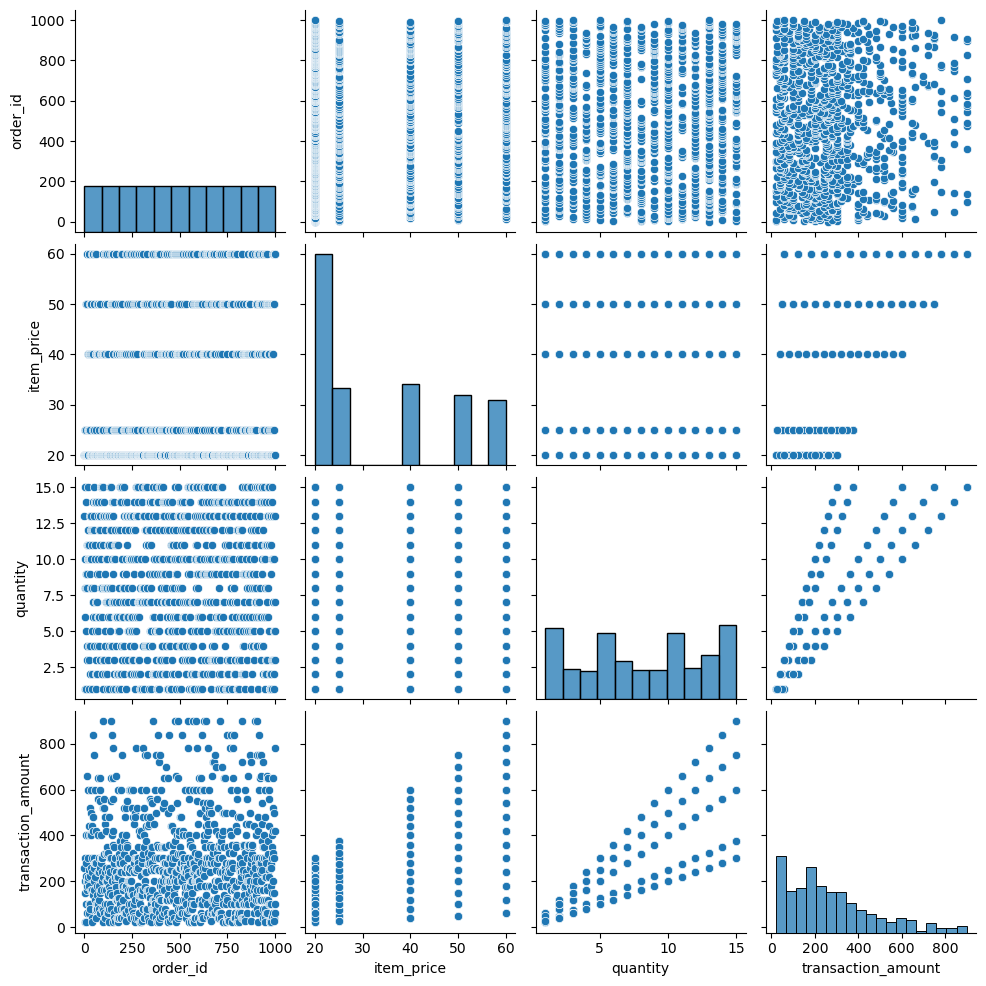

In [376]:
sns.pairplot(df)
plt.show()

# OTHER VISUALIZATION

# LINEPLOT 

In [388]:
x = np.linspace(1,20,100)

In [390]:
y =np.log(x)

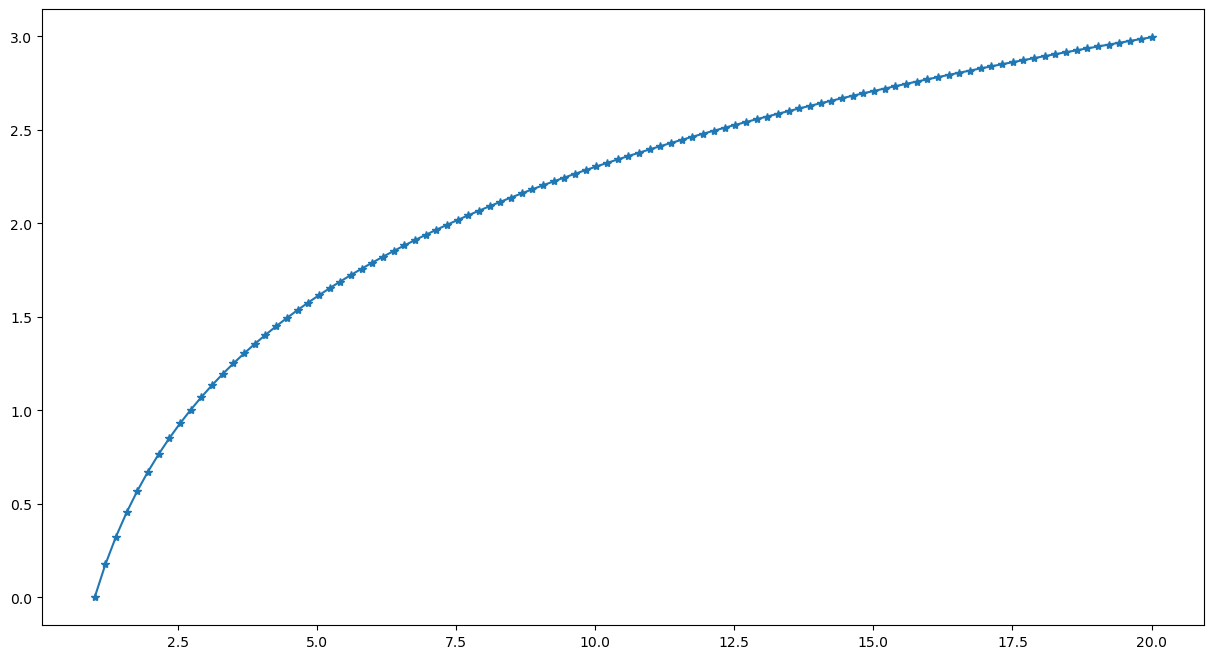

In [400]:
plt.plot(x,y,marker='*')
plt.show()

# VIOLIN PLOT 
* univariate for one numeric column 

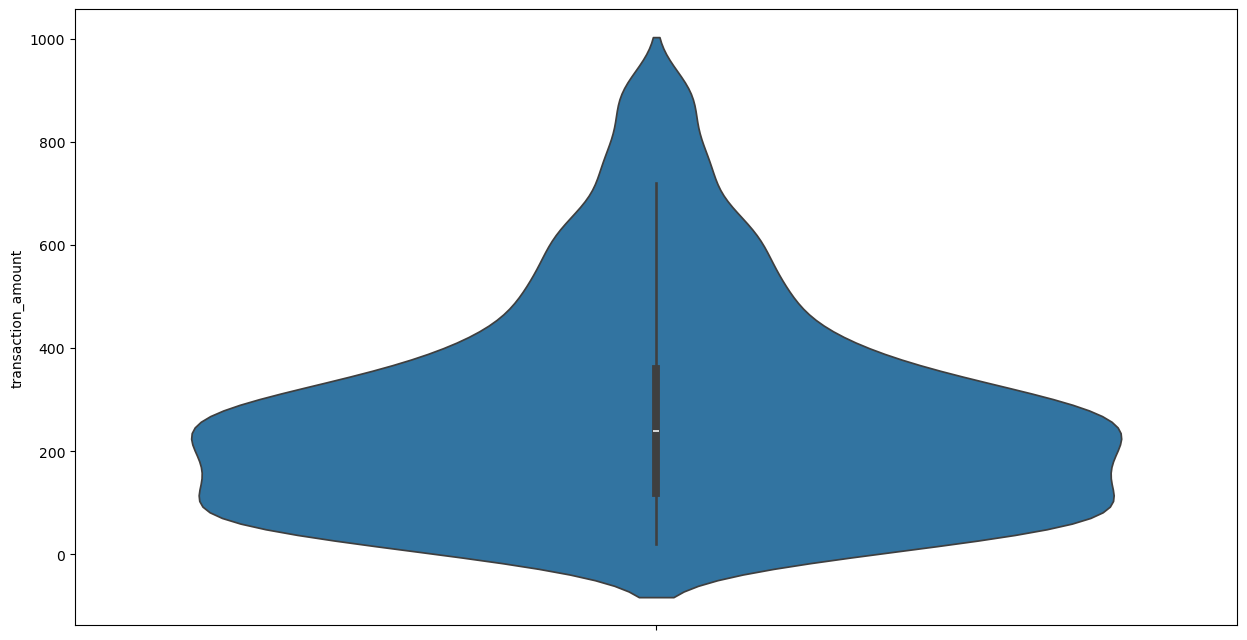

In [404]:
sns.violinplot(df['transaction_amount'''])
plt.show()

# Inference 
* Here the data lies ariund the 100 to 400 mostly as the data is more cluttered in this range ,
* Violin plot is as same as box plot cannot be used to identify the outliers in the data set preciously 

# Swarmplot - plots the data points alonng the single axis without overlapping with one another 

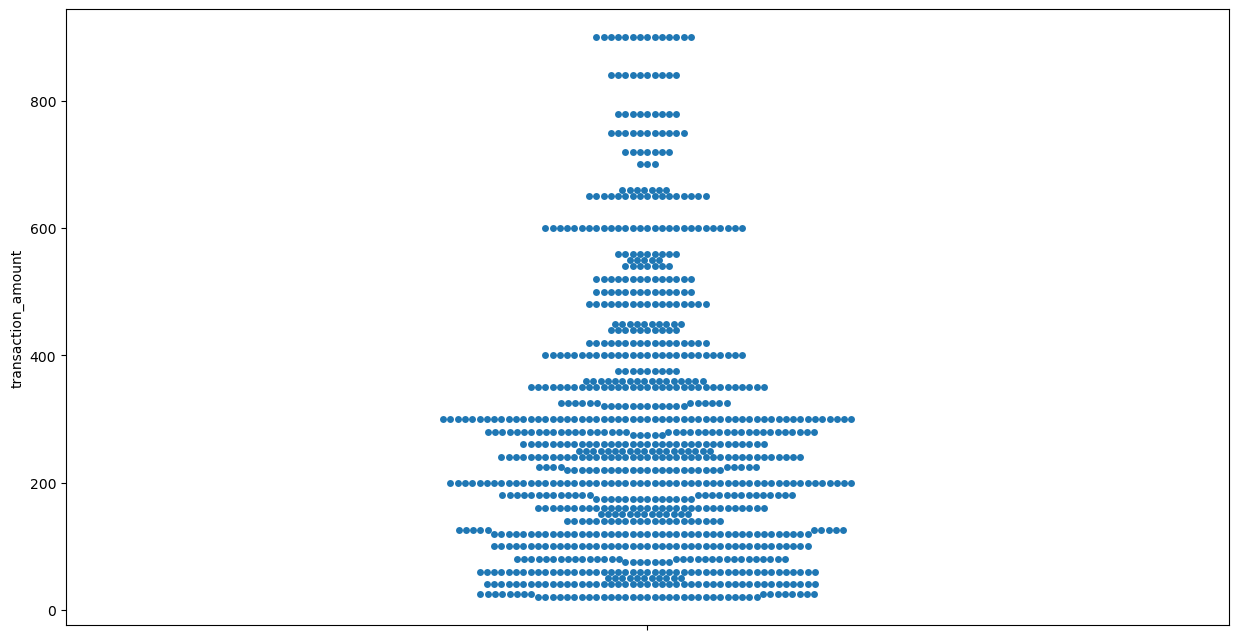

In [407]:
sns.swarmplot(df['transaction_amount'])
plt.show()

# Bivariate analysis using Swarmplot 

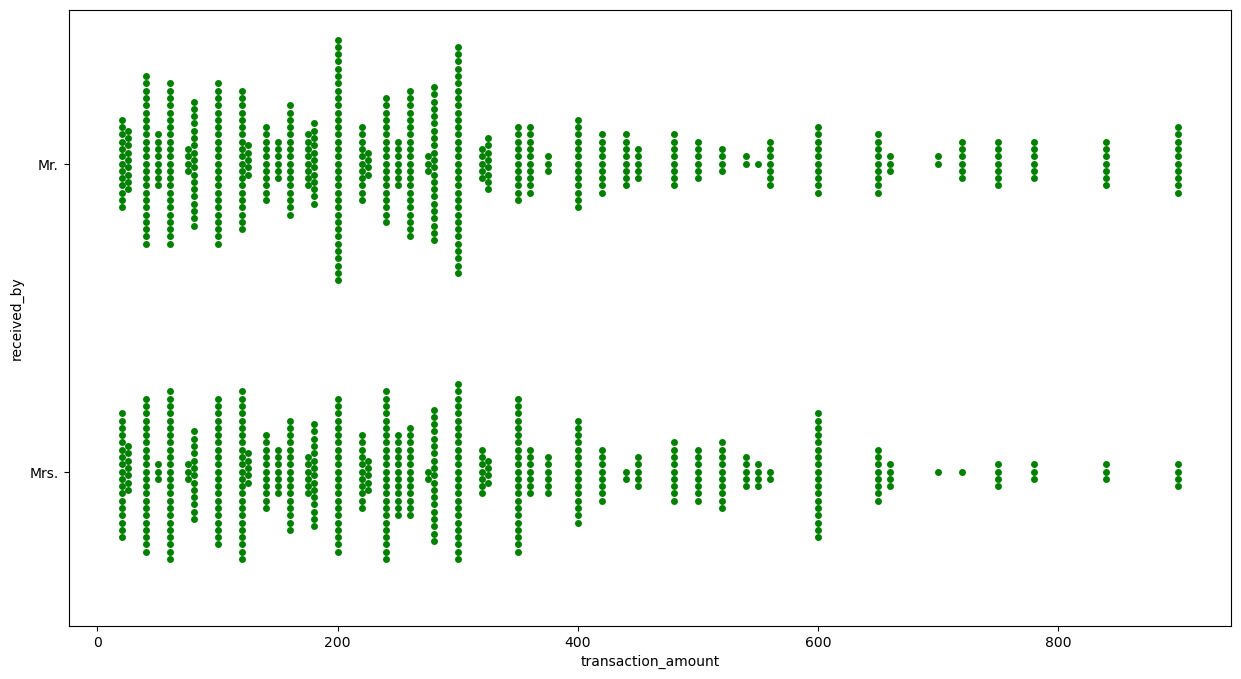

In [417]:
sns.swarmplot(x = df['transaction_amount'],y = df['received_by'],color='green')
plt.show()

# Multivariate analysis using Swarmplot 

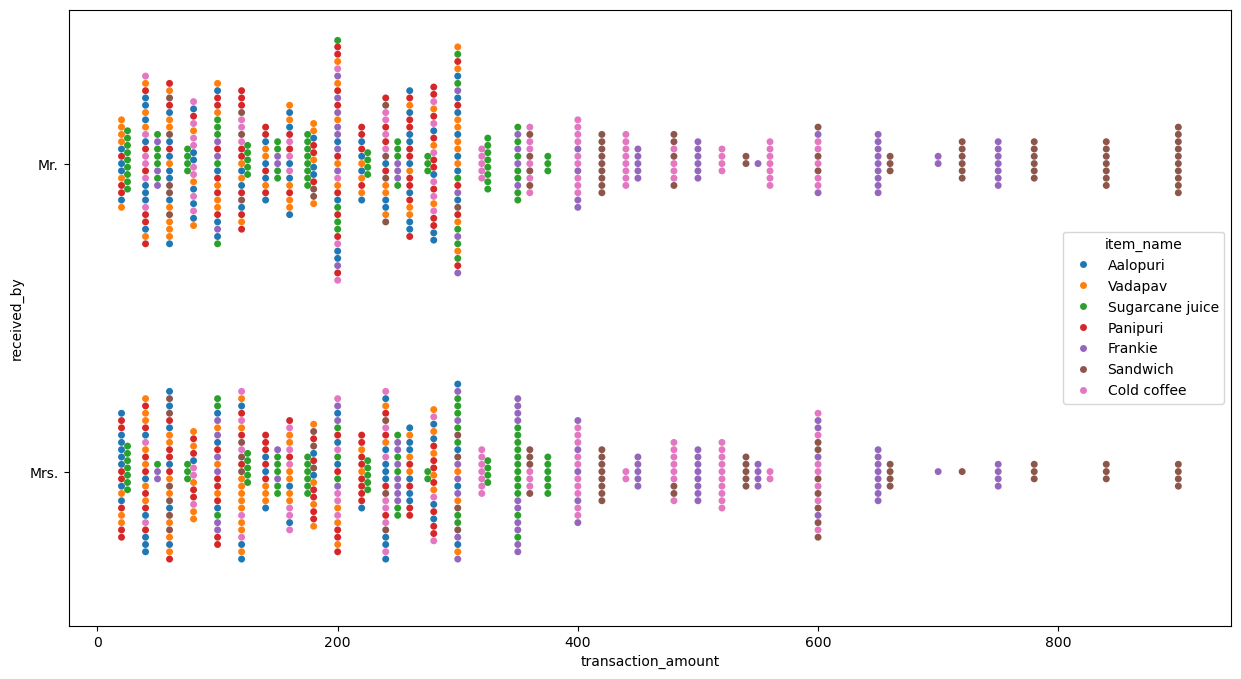

In [419]:
sns.swarmplot(x = df['transaction_amount'],y = df['received_by'],hue=df['item_name'])
plt.show()

# Inference 
In both the gender cold coffee is prefered equally which is explaind through swarmplot along the axis with colors - Check the pink color presence 

# REGRESSION PLOT 
To show the relationship between two variables and a best fit line to find the trend that of the datapoints.

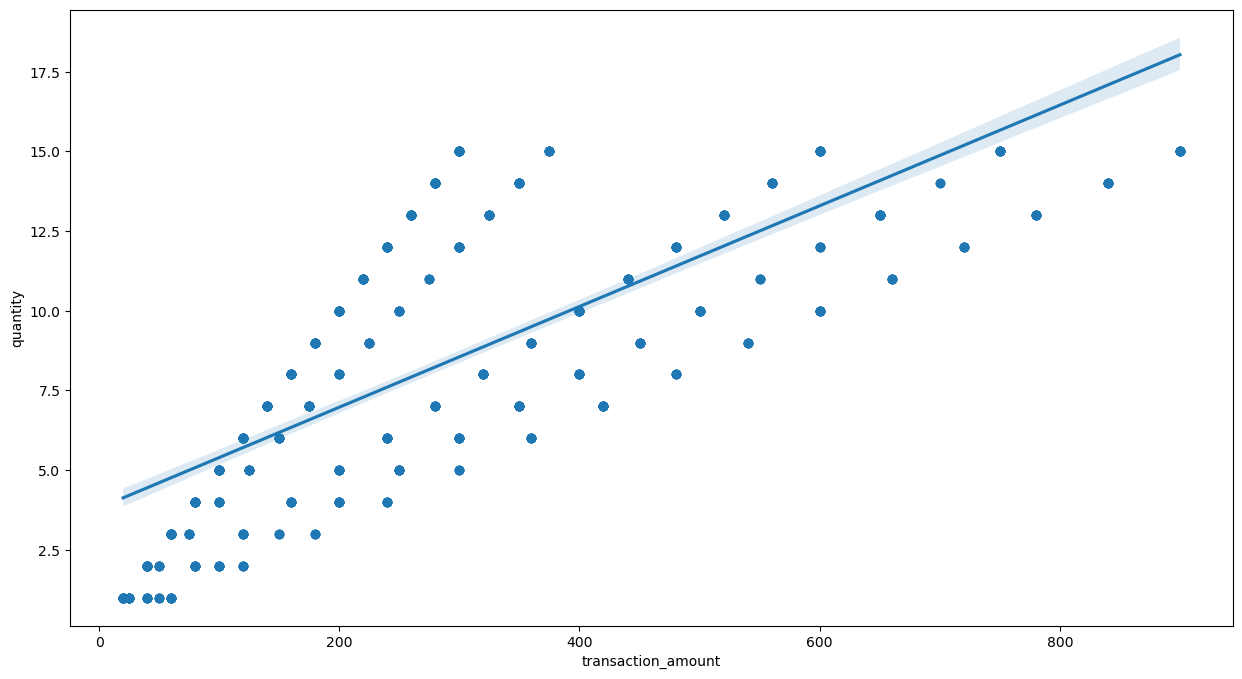

In [428]:
sns.regplot(x=df['transaction_amount'],y=df['quantity'])
plt.show()

# Inference 
* As the Quantioty increases the transaction amount also increases. The best fit also visualize that there are some anmolies in the data points 
as it is scattered below the line.